<a href="https://colab.research.google.com/github/Dinesh-Kumar-Verma/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Predictionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction


##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance




### Dataset Loading

In [2]:
# Load Dataset
df= pd.read_csv ('SeoulBikeData.csv',sep=',',encoding='latin')


### Dataset First View

In [3]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Shape of the DataSet -", df.shape)
print("There are %d rows and %d column" %(df.shape[0], df.shape[1]))

Shape of the DataSet - (8760, 14)
There are 8760 rows and 14 column


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
# Visualizing the missing values


### What did you know about your dataset?

The dataset is all about the rented bike count per hour based upon the weather condition and holiday information.

It contains 8760 rows and 14 columns, where the columns have different features or attributes of weather and holiday.

There are no duplicated and null vlaues.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = "all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [9]:
dataset= df.copy()

In [10]:
# Renaming the columns names to ensure compatibility, readability, and prevent errors.
dataset.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)


In [11]:
# converting date feature into datetime data type
dataset.date = dataset.date.apply(lambda x : dt.strptime(x,'%d/%m/%Y'))

In [12]:
# Splitting date into year, month, day & day_name
dataset['day'] = dataset['date'].dt.day
dataset['year'] = dataset['date'].dt.year
dataset['weekday'] = dataset['date'].dt.day_name()
dataset['month'] = dataset['date'].dt.strftime('%b')

# droping data column
dataset.drop('date', axis = 1, inplace = True)


In [13]:
# The year count
dataset.year.unique()

array([2017, 2018])

In [14]:
dataset.groupby(['year'])['month'].unique()

year
2017                                                [Dec]
2018    [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, ...
Name: month, dtype: object

In [15]:
dataset.month.unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [16]:
df = dataset

In [17]:
# defining categorical feature.
categorical_feature = ['hour','seasons', 'holiday', 'func_day', 'day', 'month', 'year', 'weekday']

# Defining numerical features
numerical_features = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall']




I have renaimed the columns name to ensure compatibility, readability, and prevent errors, and extracted day, month, and year, columns from the date columns and dropped the original date column.

**Insights-** The dataset contains one year data of rented bike count from the december month of 2017 and january to november month of 2018.








## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Univariate Analysis of the Categorical Data

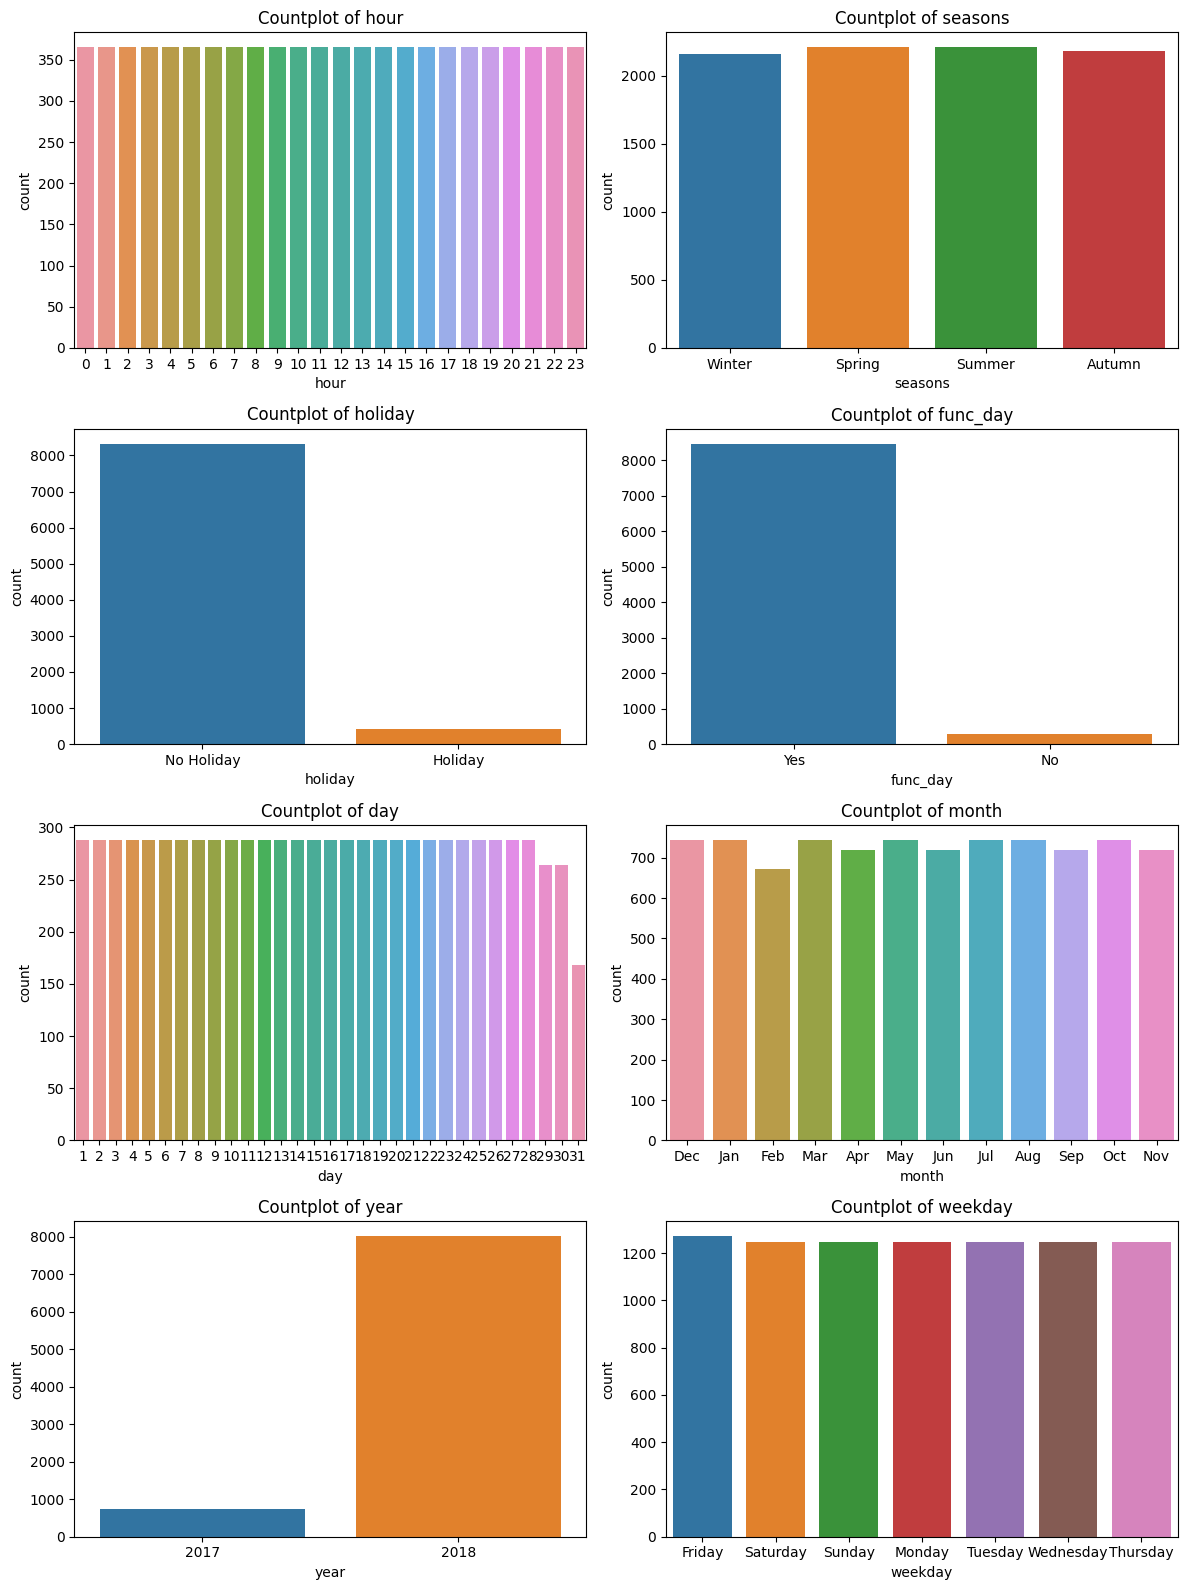

In [ ]:
# Calculate the number of rows needed for the subplot grid
num_rows = (len(categorical_feature) + 1) // 2  # Adding 1 to round up if there's an odd number of features
# Create the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()
# Loop through the categorical features and plot countplots
for i, feature in enumerate(categorical_feature):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot of {feature}")

# Hide any unused subplots if there are an odd number of features
if len(categorical_feature) % 2 == 1:
    axes[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



I have used bar plot to compare the each unique values of the categorical features.


##### 2. What is/are the insight(s) found from the chart?

There are no abnormalities in the categorical features. It means that there are
no duplicated or null values (extra or less values) values in the date or in the holiday information.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - Distribution of dependent Variable (Univariat Analysis)

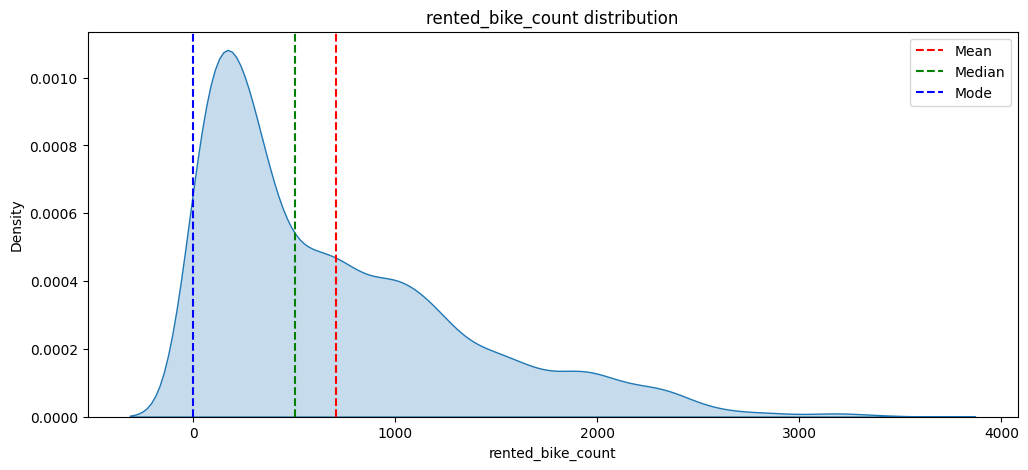

In [ ]:
# Defining dependent variable
dependent_variable = 'rented_bike_count'

# Visualizing the distribution of the dependent variable (rental bike count)
plt.figure(figsize=(12, 5))
sns.kdeplot(df[dependent_variable], fill=True)
plt.xlabel(dependent_variable)
plt.title(dependent_variable + ' distribution')
plt.axvline(df[dependent_variable].mean(), color='red', linestyle='dashed', label="Mean")
plt.axvline(df[dependent_variable].median(), color='green', linestyle='dashed', label="Median")
plt.axvline(df[dependent_variable].mode()[0], color='blue', linestyle='dashed', label="Mode")
plt.legend()  # Add legend to the plot

plt.show()


##### 1. Why did you pick the specific chart?

I have used KDE plot to see the distribution of the dependent feature.


##### 2. What is/are the insight(s) found from the chart?

"rented_bike_count" is right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - Density and Box Plot of Numerical features

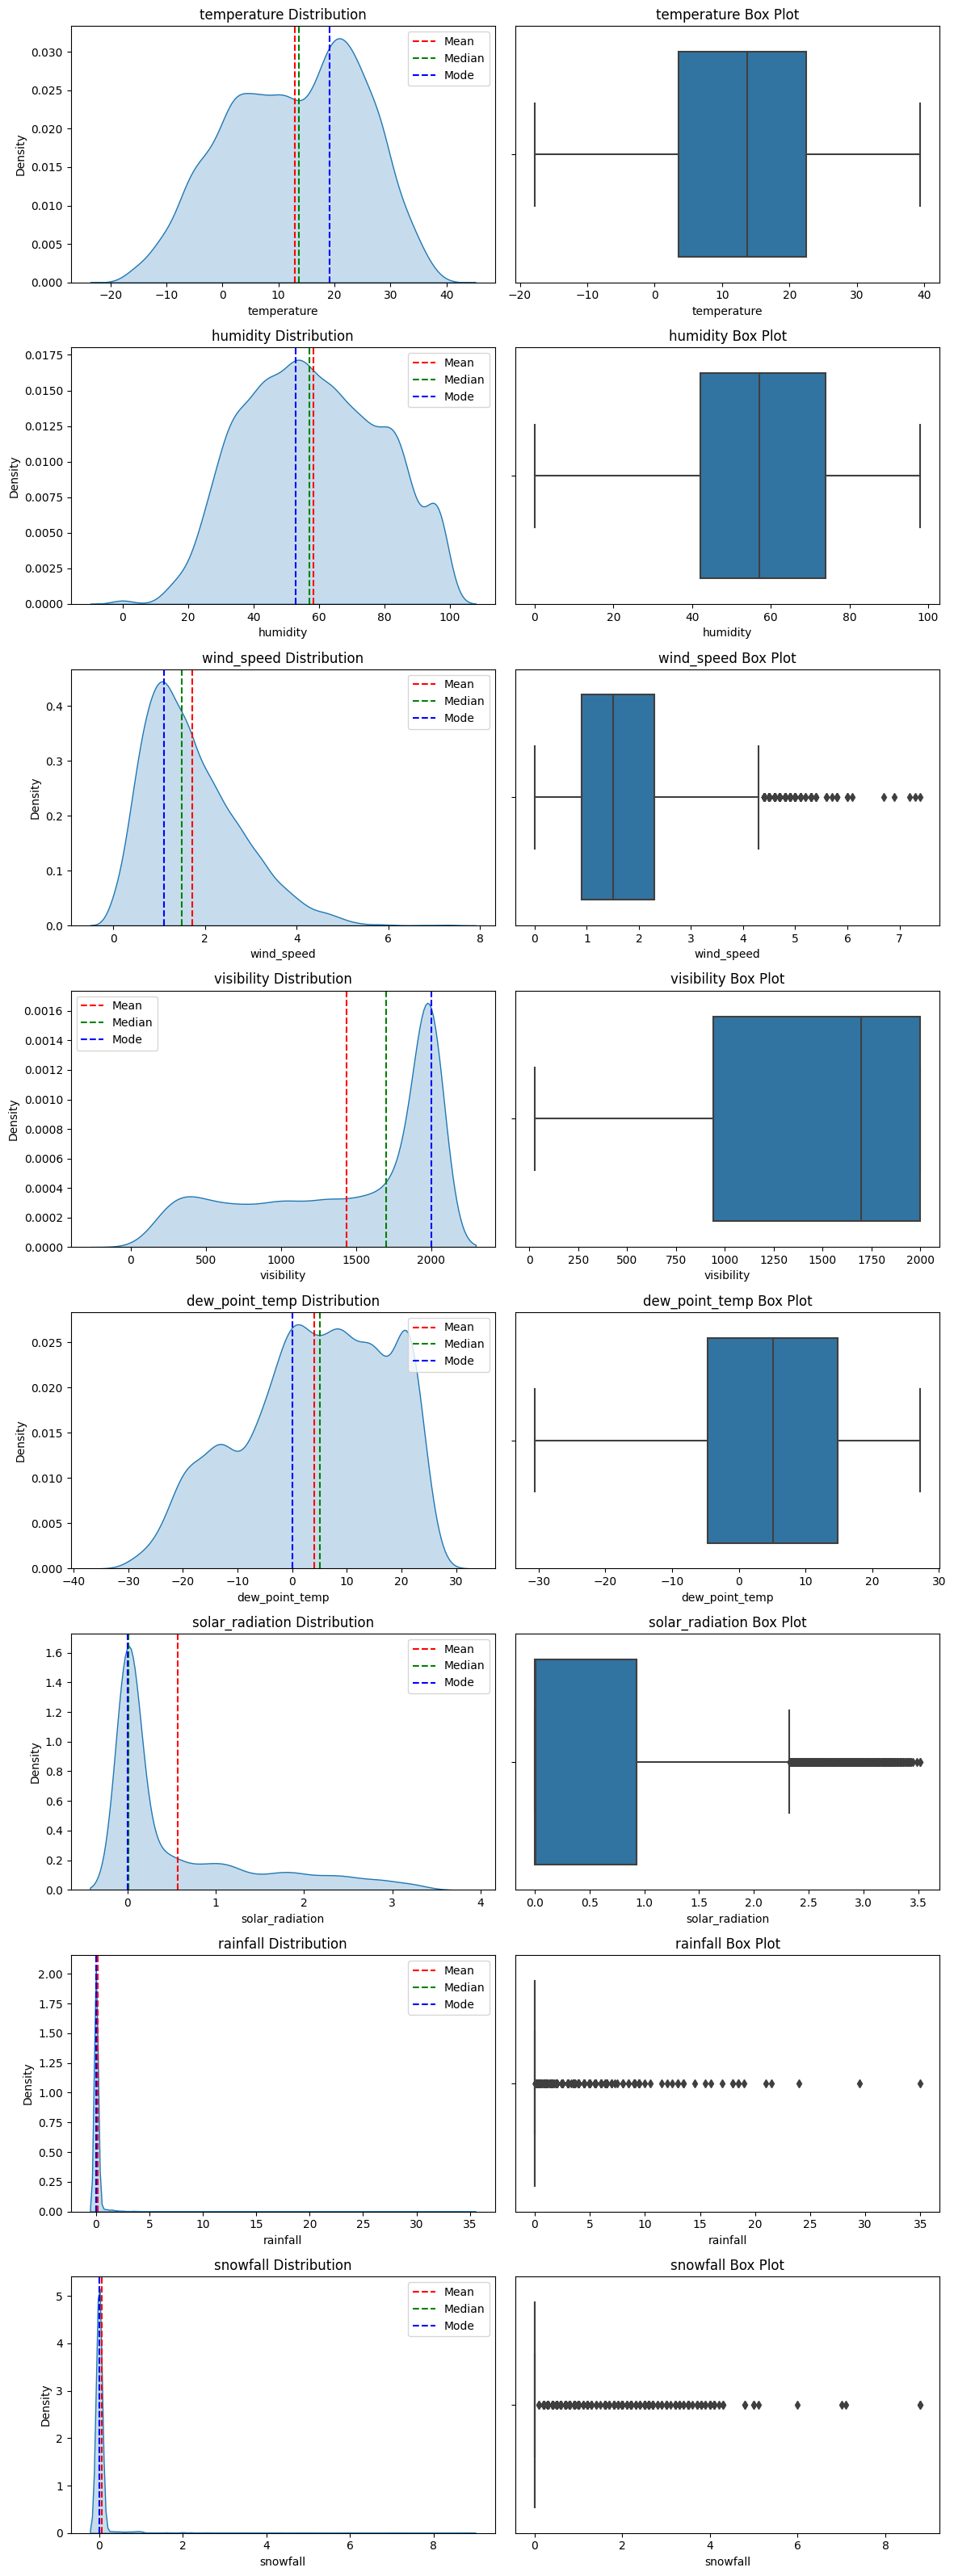

In [ ]:
# Defining numerical features
numerical_features = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall']

# Create a grid of subplots
rows = len(numerical_features)
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

# Plot distribution plot and box plot for each numerical feature
for i, feature in enumerate(numerical_features):
    # KDE plot
    sns.kdeplot(df[feature], ax=axes[i, 0], fill = True)
    axes[i, 0].set_title(f'{feature} Distribution')

    # Calculate mean, median, and mode
    mean_val = np.mean(df[feature])
    median_val = np.median(df[feature])
    mode_val = df[feature].mode().values[0]

    # Add vertical lines for mean, median, and mode on the KDE plot
    axes[i, 0].axvline(x=mean_val, color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(x=median_val, color='green', linestyle='--', label='Median')
    axes[i, 0].axvline(x=mode_val, color='blue', linestyle='--', label='Mode')

    axes[i, 0].legend()

    # Box plot
    sns.boxplot(x=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Box Plot')

plt.tight_layout()  # Adjust spacing between subplots automatically
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?



*   Temperature, dew_point_temp and Humidity features are nearly normally distributed.
*   wind_speed, dew_point_temp, solar_radiation, rainfall and snowfall features are right skewed.
* visibility feature is left skewed or negatively skewed.
* wind_speed, solar_radiation have outliers towards the maximum. It is common in nature that wind_speed and solar_radiation can be high than the normal days.
* rainfall and snowfall alos has most of the outliers toward the maximum values. Because in a year only few days the snowfall and rainfall happens and rest of the days it remains general.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - **Bibariate Analysis of Categorical feature vs rented bike count**

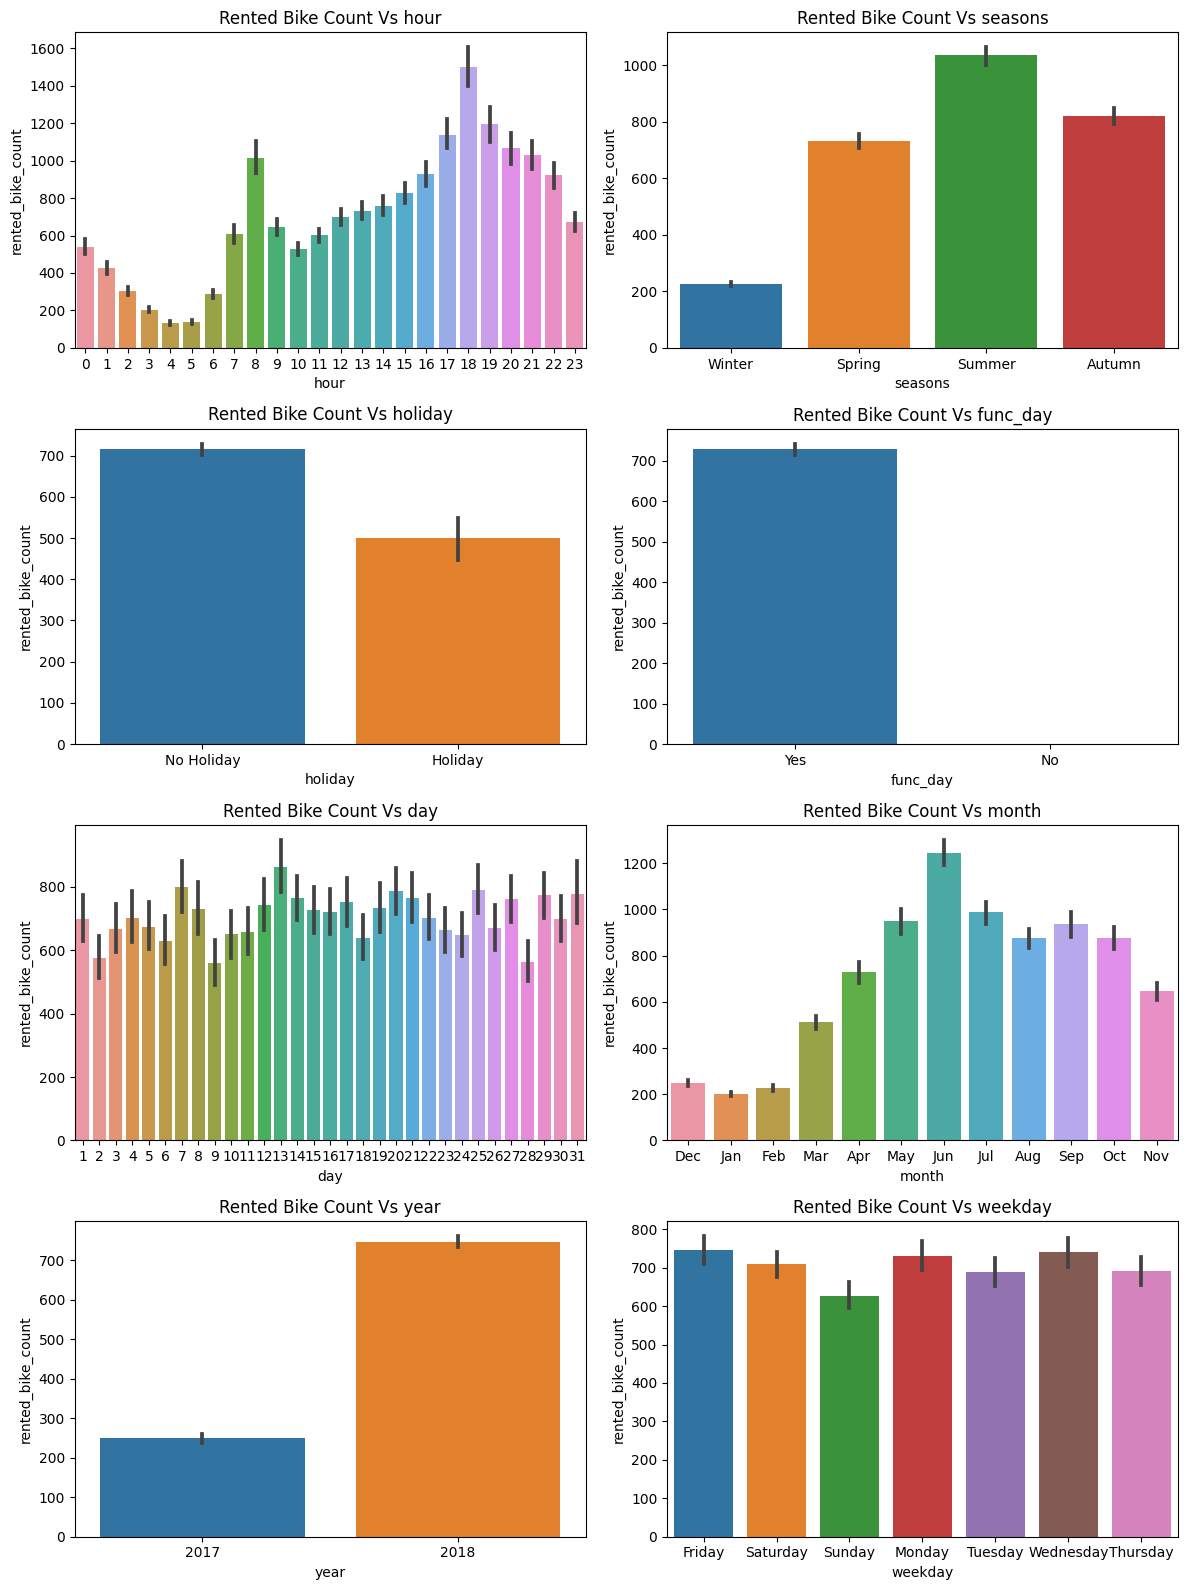

In [ ]:
# Calculate the number of rows needed for the subplot grid
num_rows = (len(categorical_feature) + 1) // 2  # Adding 1 to round up if there's an odd number of features
# Create the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()
# Loop through the categorical features and plot countplots
for i, feature in enumerate(categorical_feature):
    sns.barplot(x=feature, y = "rented_bike_count", data=df, ax=axes[i])
    axes[i].set_title(f"Rented Bike Count Vs {feature}")

# Hide any unused subplots if there are an odd number of features
if len(categorical_feature) % 2 == 1:
    axes[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Bike Rented bike count is higher during the rush hour, and 6 pm is the peak time of the day following by the 7 and 5 pm.
* Rented bike count is higher in the summer and lower in the winter.
* Rented bike count is higher in the Non Holiday and lower in the Holiday days.
* On a Non functioning day no bike are rented.
* Rented bike count in the june month is higher and in the january month it is lower compared to all the months.
* In weekdays rented bike count remains nearly constant. On the Sunday rented bike count is minimum copared to other days.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights will help to create a positive business impact by managing the resources according to the demand.

#### Chart - 4 Multivariate Analysis of Categorical Feature independent feature and dependent feature

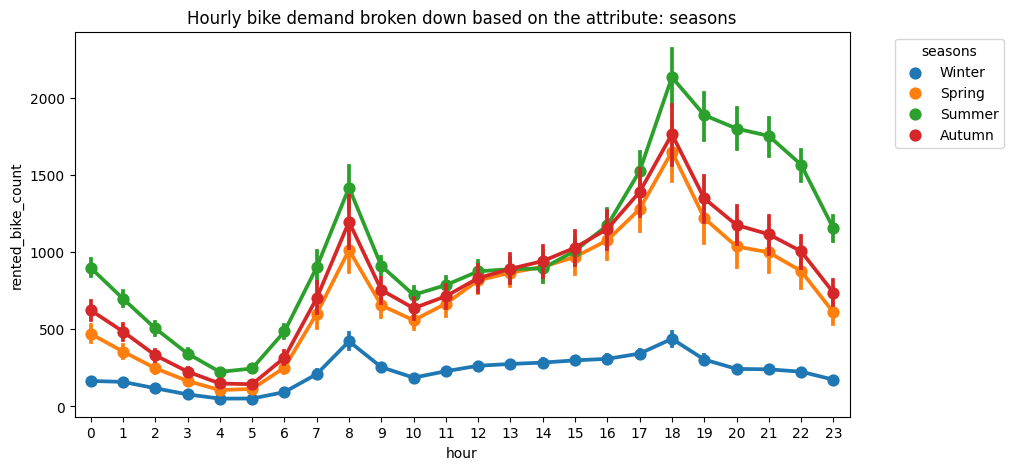

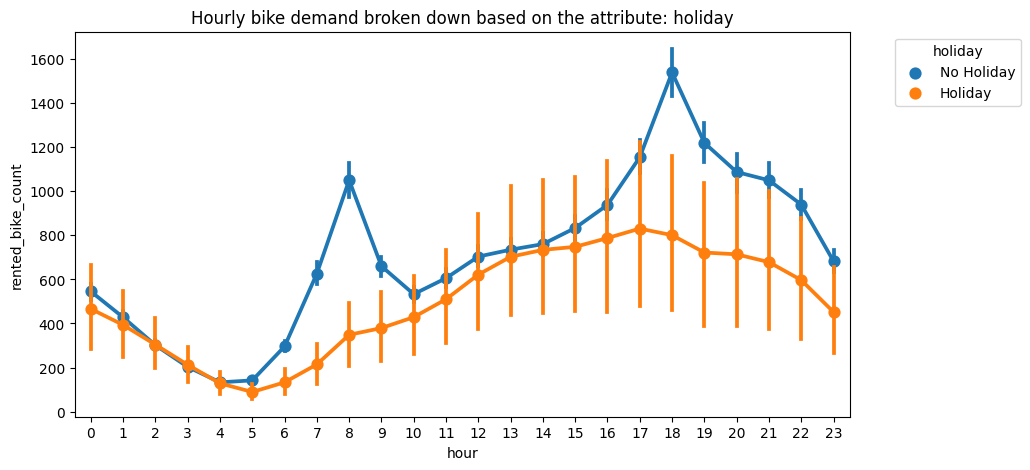

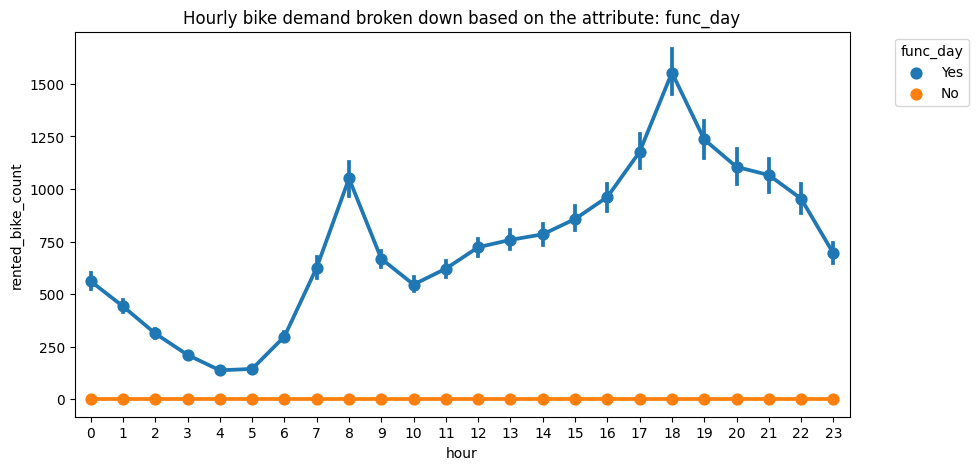

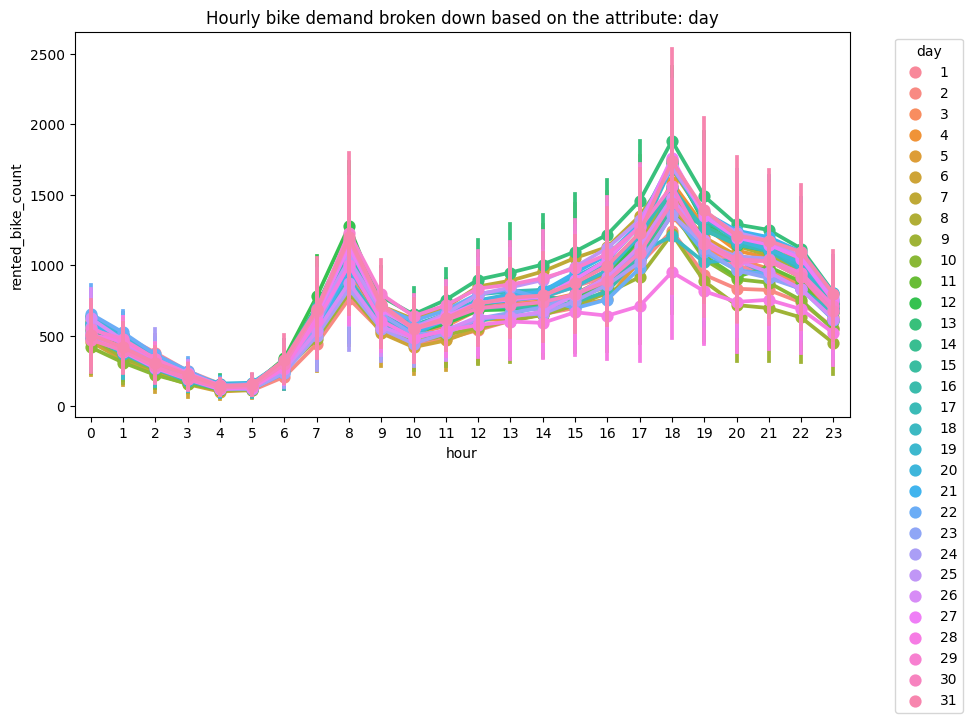

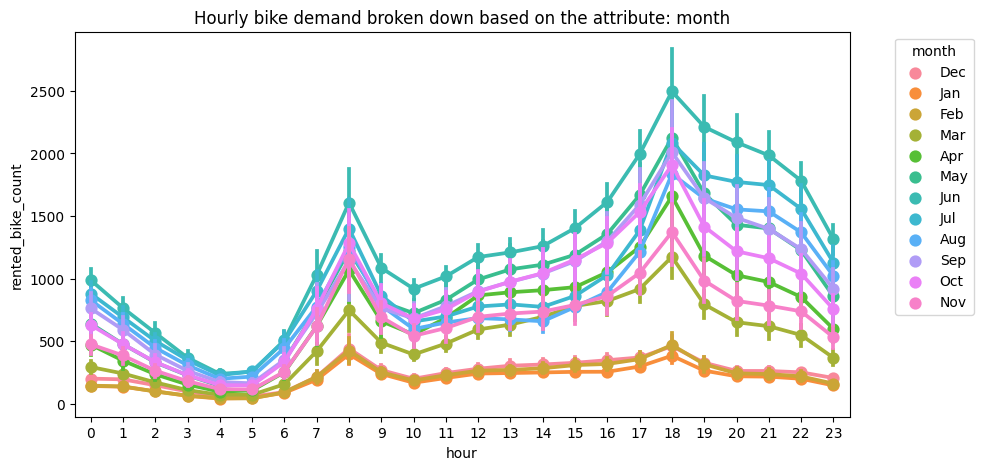

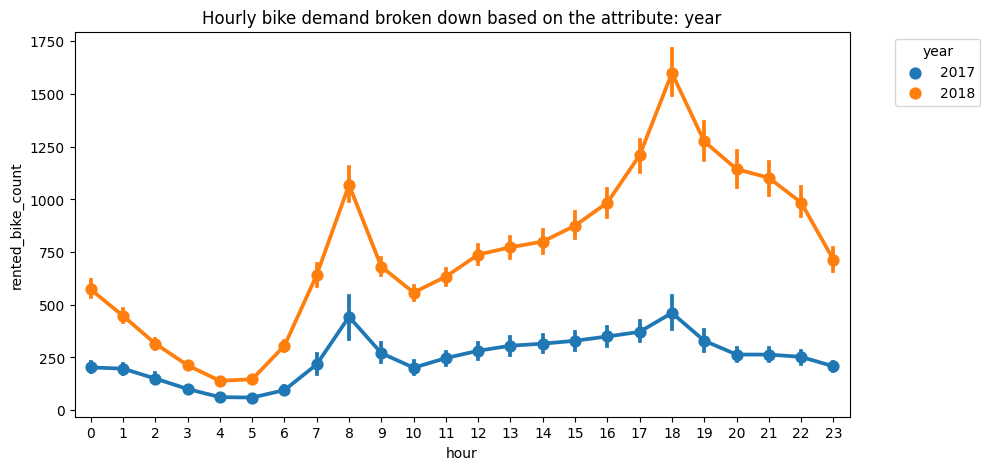

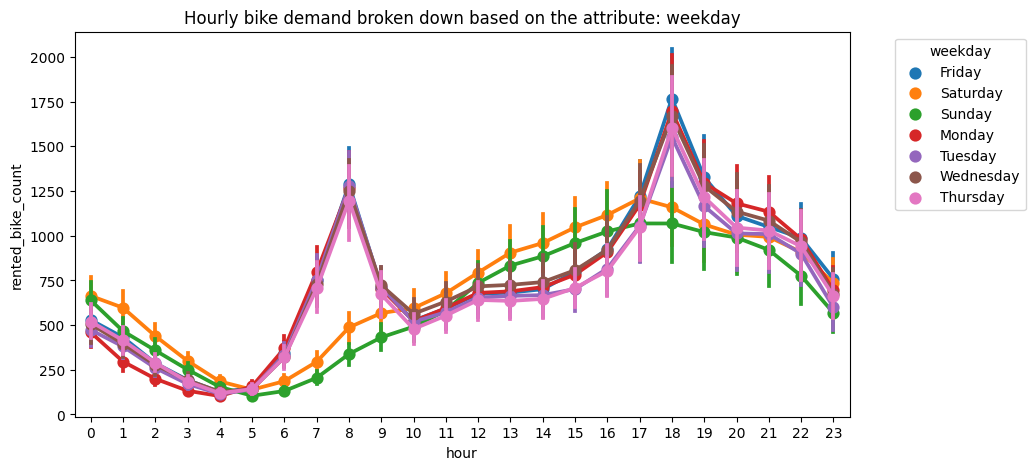

In [ ]:
# Analyzing Relation of the different categorical feature on the demand of the Rented Bike Count hourly.
for feature in categorical_feature:
  if feature == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=feature, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+feature)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=feature)
    plt.show


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* In winter rented bike count is lower than the other seasons.
* Rented bike count on the Holiday increases slowly from the morning but in the non holoiday days it makes peak at office times.
* The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Scatter Plot and Box plot on Numerical Fearure and Rented Bike Count

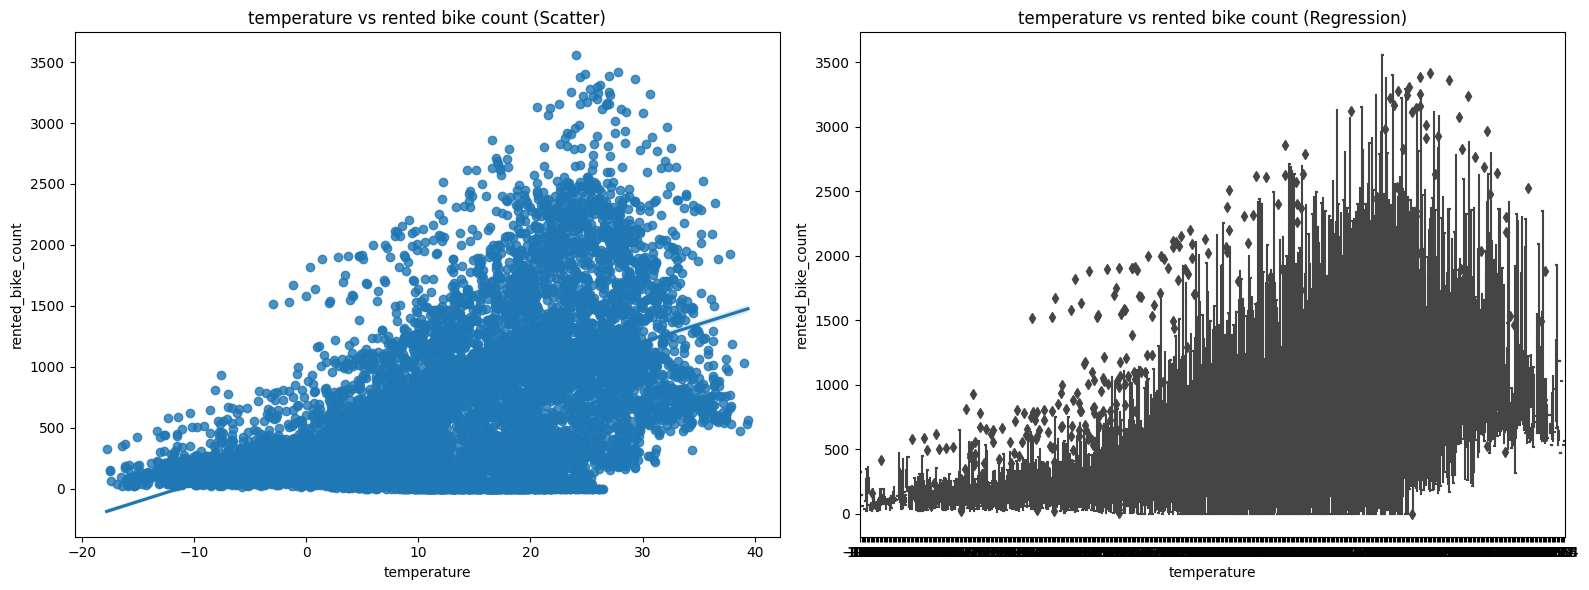

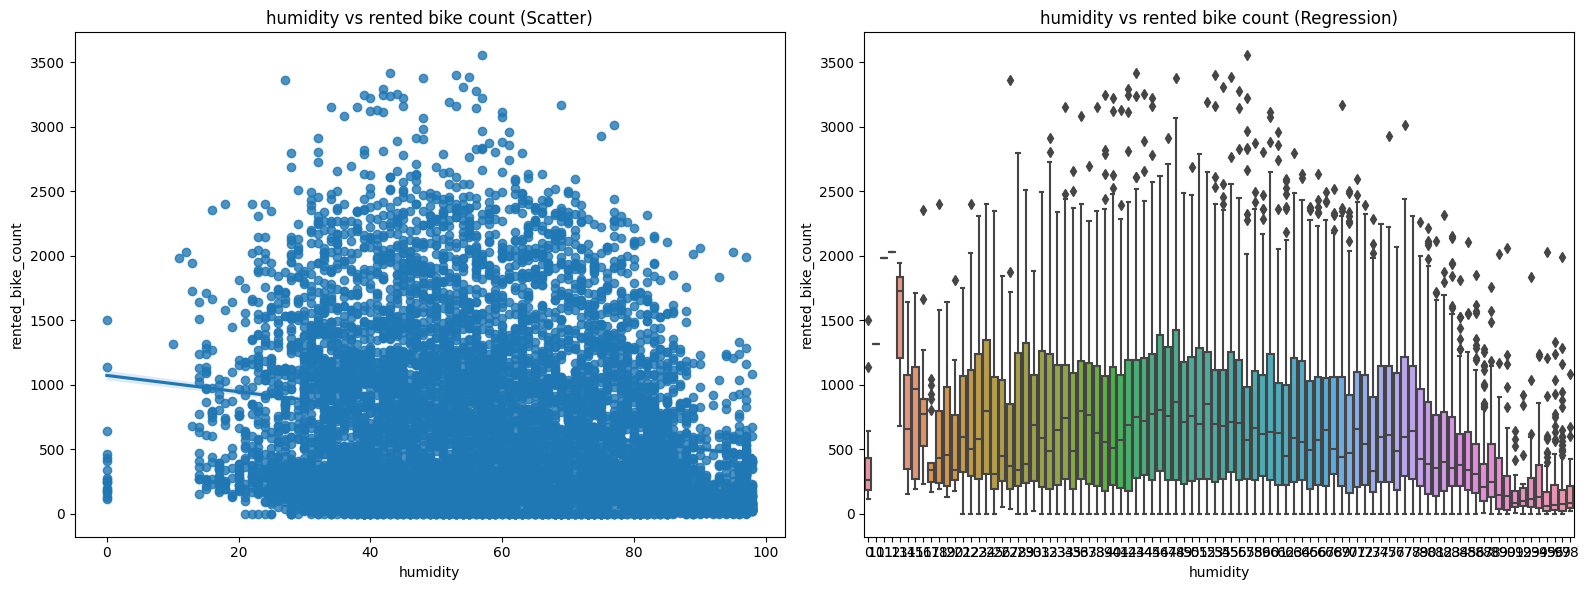

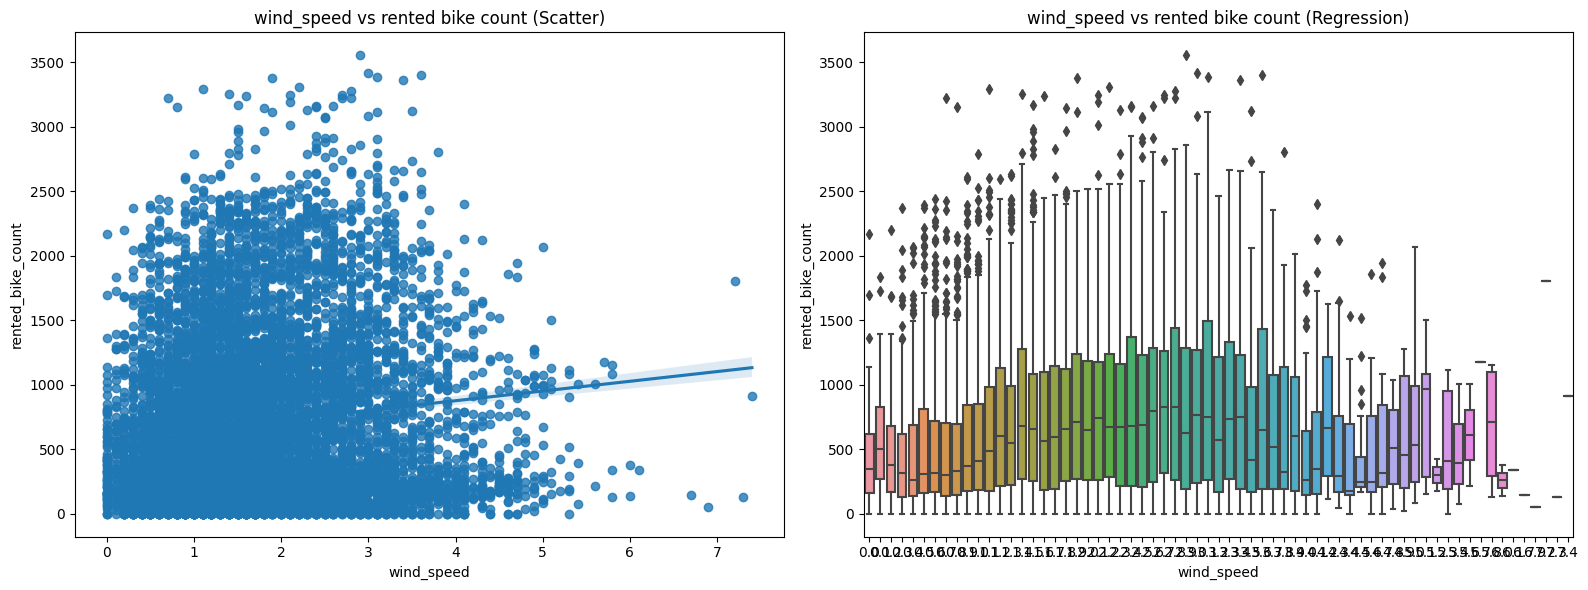

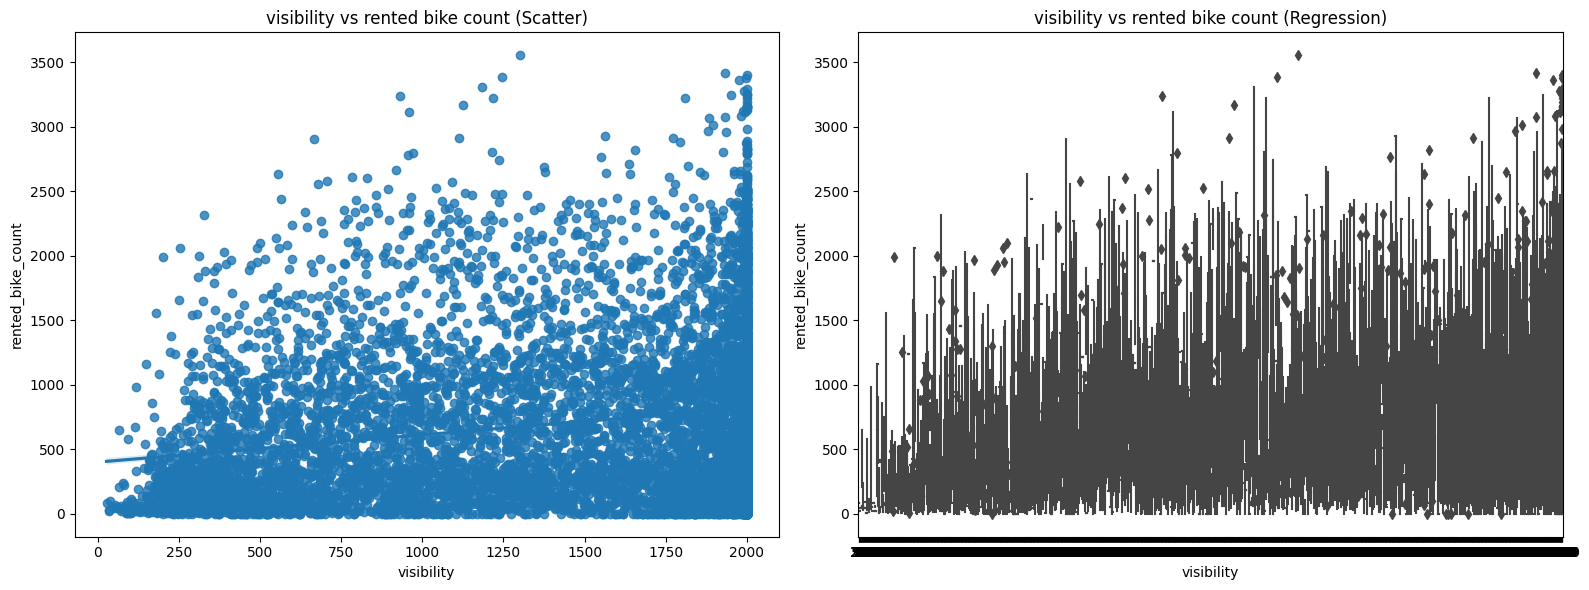

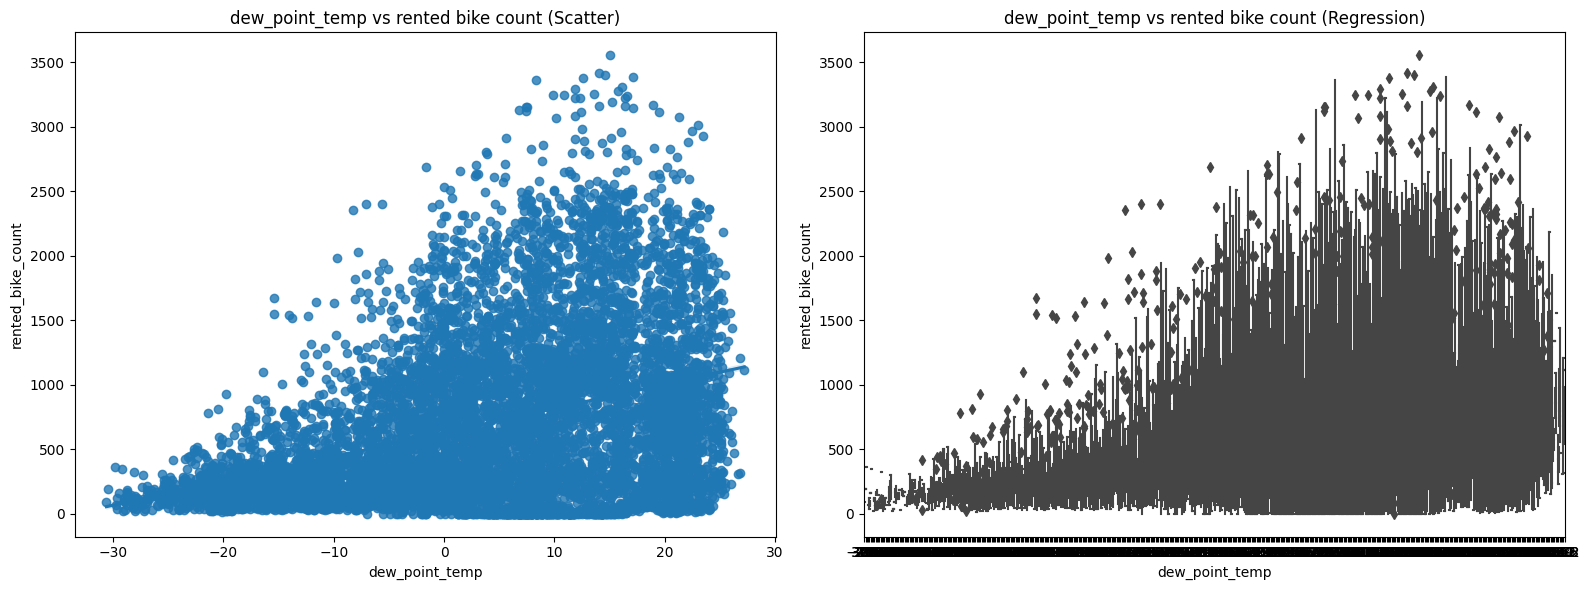

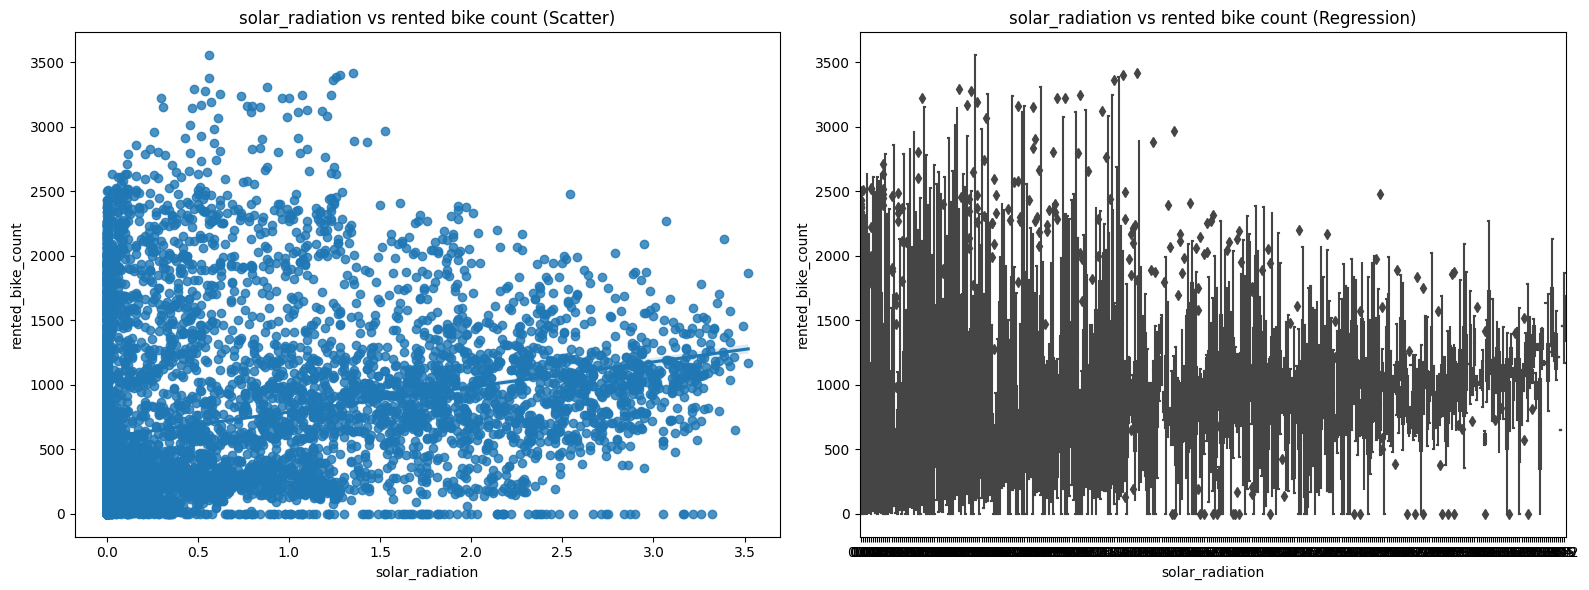

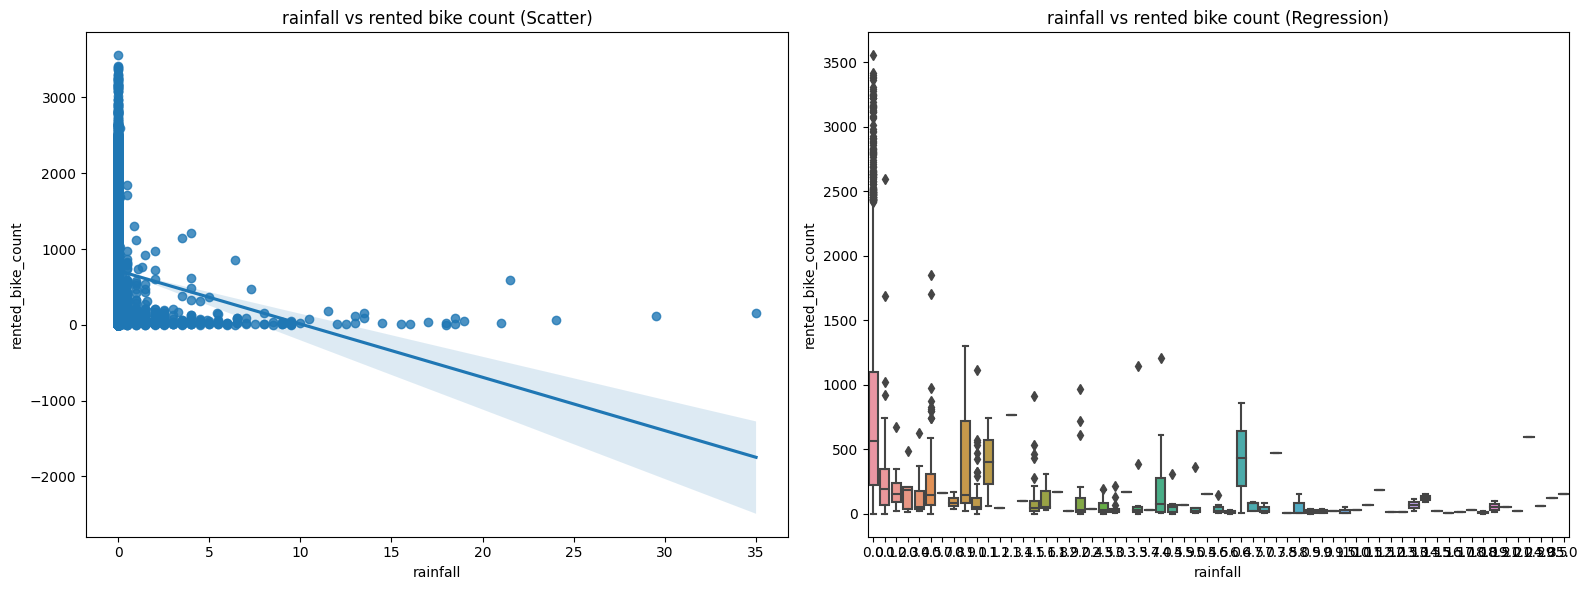

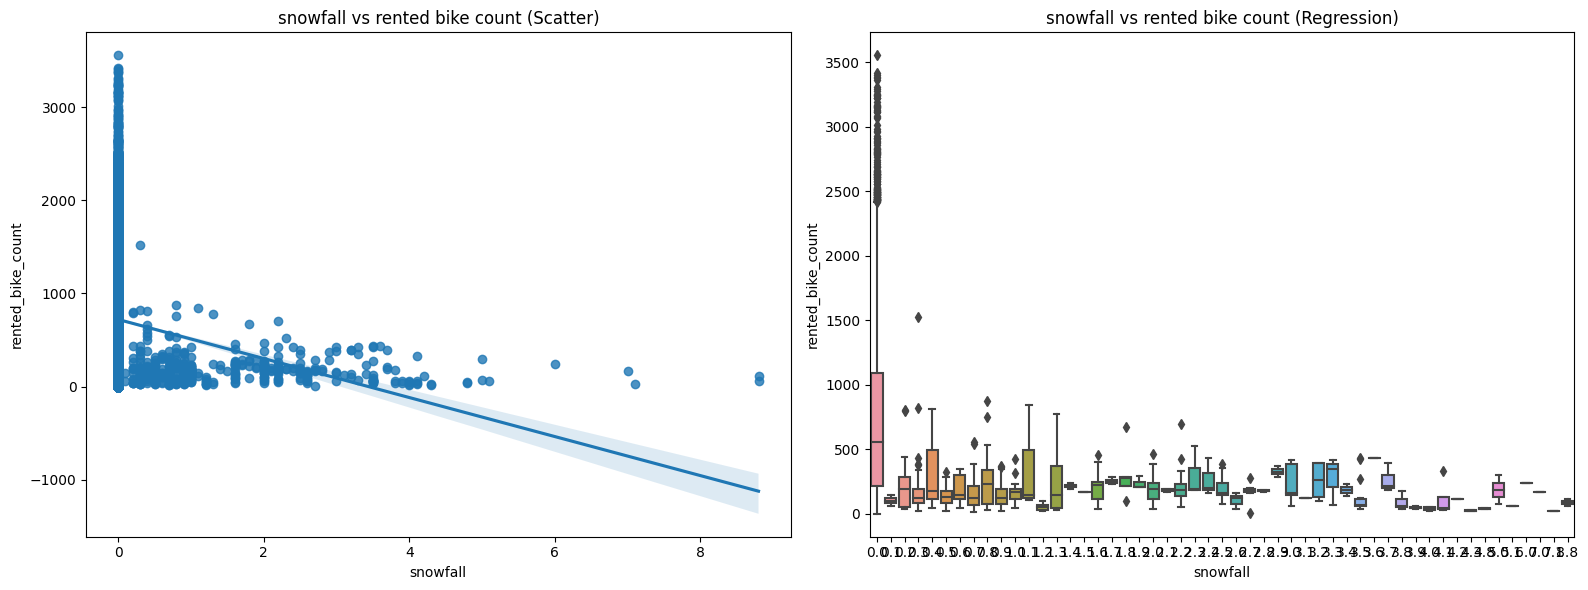

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numerical_features' is a list of your numerical independent features
#numerical_features = ['feature1', 'feature2', 'feature3']

# Loop through numerical features
for feature in numerical_features:
    # Create a figure and a grid of 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    # Scatter plot
    sns.regplot(x=feature, y='rented_bike_count', data=df, ax=axes[0])
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('rented_bike_count')
    axes[0].set_title(f'{feature} vs rented bike count (Scatter)')

    # Regression plot
    sns.boxplot(x=feature, y='rented_bike_count', data=df, ax=axes[1])
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('rented_bike_count')
    axes[1].set_title(f'{feature} vs rented bike count (Regression)')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* In the bivariate analysis all the features have outliers.
* Only temprature and dew_point_temp are well linerly distributed compared to other features.
* Humidity, snowfall and rainfall are negatively correlated and other numerical features or positively correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-77-4b281d7e0f73>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

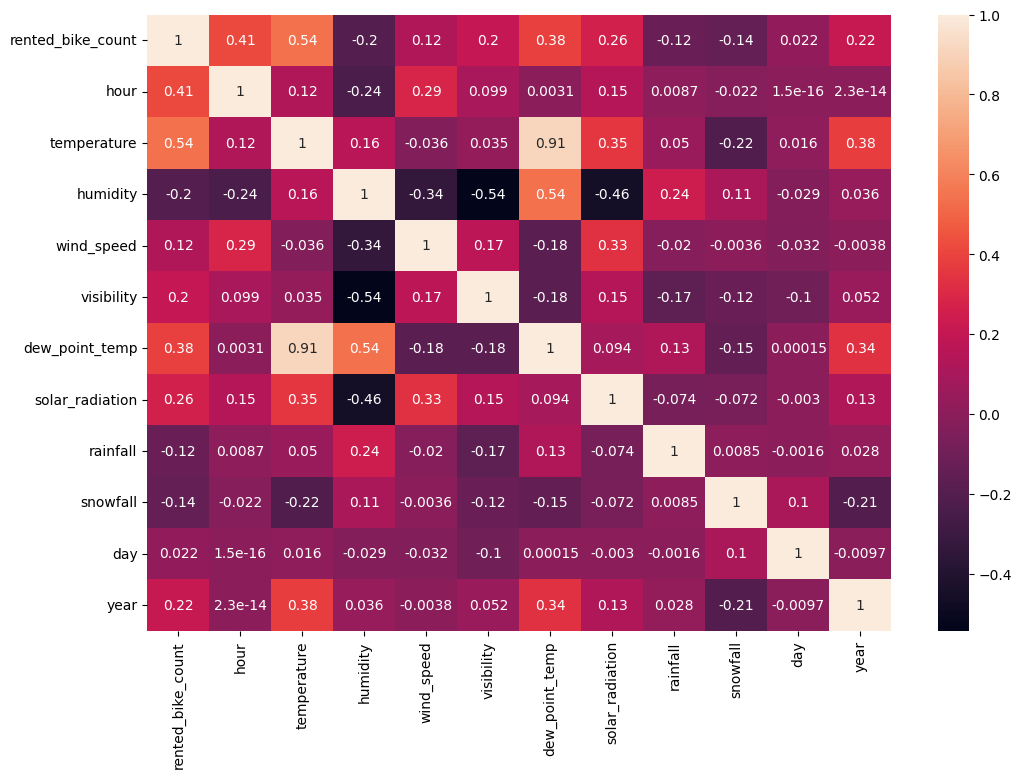

In [ ]:
# Correlation Heatmap visualization
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Temperature, hour and dew_point_temp is higly correlated with rented bike count than the other features.
* Temperature and dew_point_temp is highly correlated with each other.

#### Chart - 15 - Pair Plot

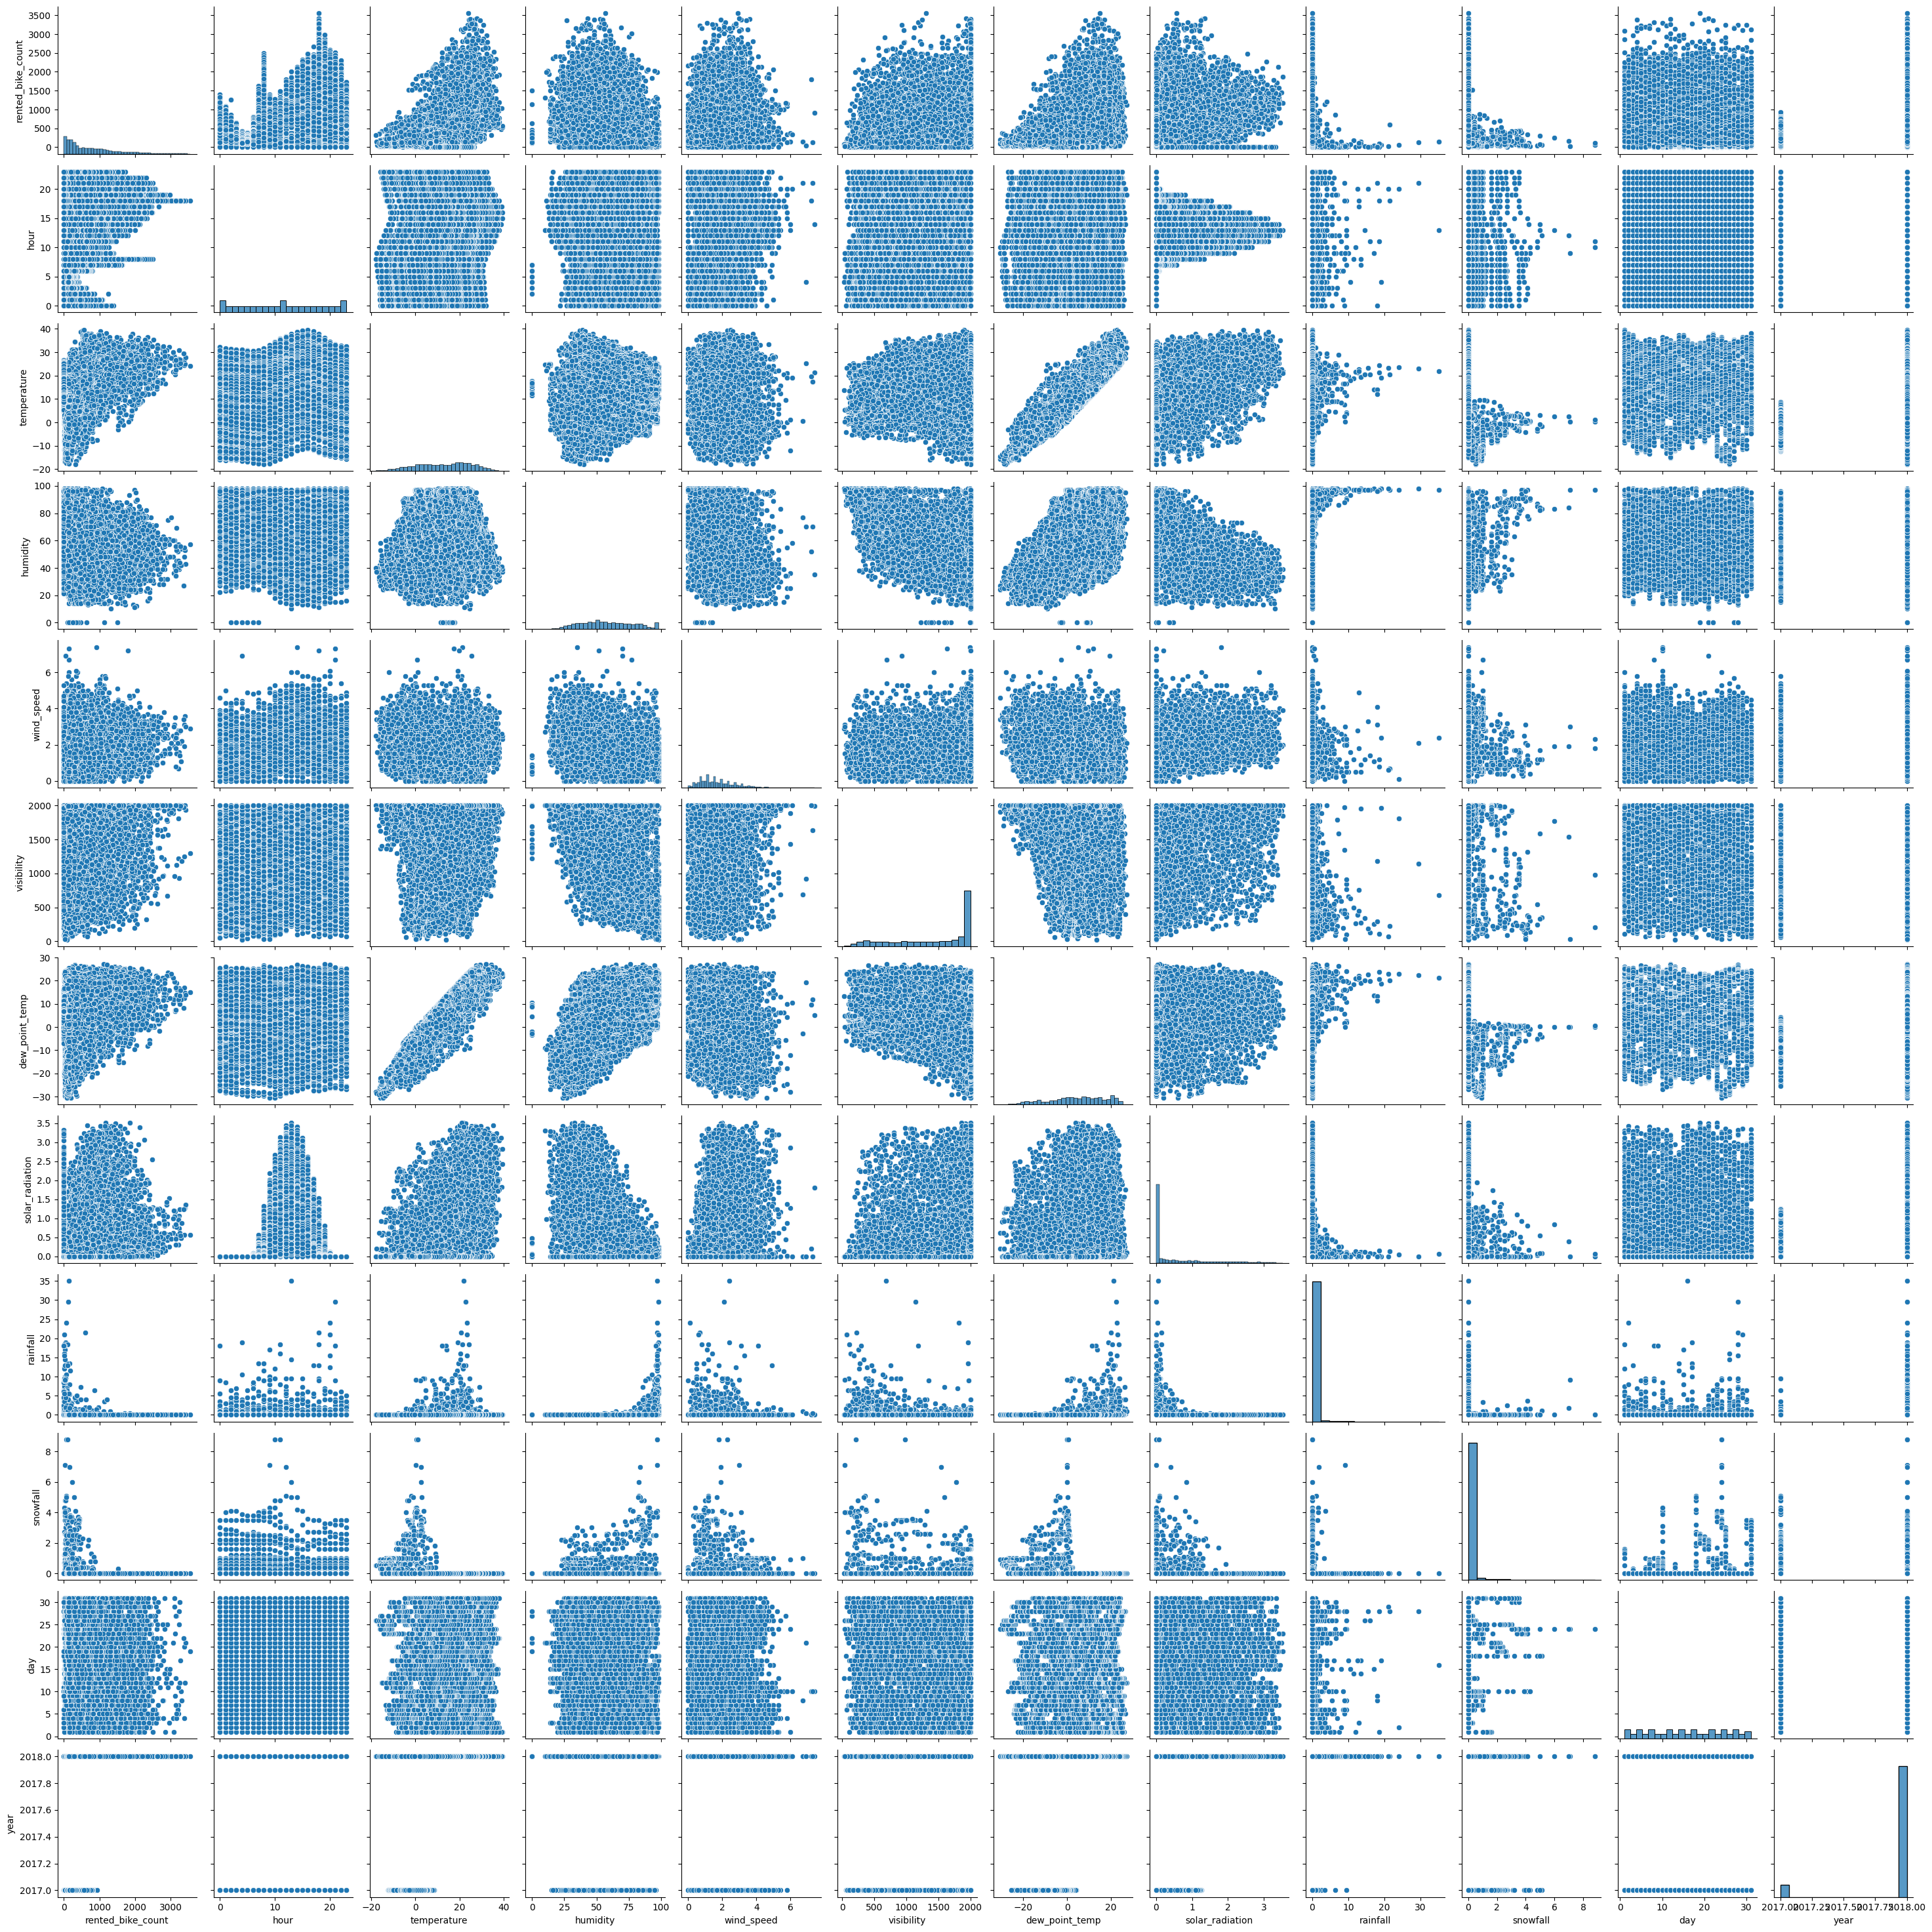

In [ ]:
# Pair Plot visualization code
sns.pairplot(data= df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
for i in df.columns:
    print(f'{i}: {"Not Gaussian" if shapiro(df[i])[1]<0.05 else "Gaussian"}  {shapiro(df[i])}')

rented_bike_count: Not Gaussian  ShapiroResult(statistic=0.8822193145751953, pvalue=0.0)
hour: Not Gaussian  ShapiroResult(statistic=0.950985312461853, pvalue=0.0)
temperature: Not Gaussian  ShapiroResult(statistic=0.9800466299057007, pvalue=2.8581660248824207e-33)
humidity: Not Gaussian  ShapiroResult(statistic=0.9823657870292664, pvalue=1.433537460121575e-31)
wind_speed: Not Gaussian  ShapiroResult(statistic=0.9468225240707397, pvalue=0.0)
visibility: Not Gaussian  ShapiroResult(statistic=0.8350759744644165, pvalue=0.0)
dew_point_temp: Not Gaussian  ShapiroResult(statistic=0.9661485552787781, pvalue=4.494804954168283e-41)
solar_radiation: Not Gaussian  ShapiroResult(statistic=0.7063096761703491, pvalue=0.0)
rainfall: Not Gaussian  ShapiroResult(statistic=0.11207789182662964, pvalue=0.0)
snowfall: Not Gaussian  ShapiroResult(statistic=0.16735047101974487, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


TypeError: ignored

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
import numpy as np

# Load the data
#df = pd.read_csv("seoul_bike_sharing_data.csv")

# Create the summer and winter dataframes
summer = df[df["seasons"] == "Summer"]
winter = df[df["seasons"] == "Winter"]

# Calculate the mean number of bike rentals for summer and winter
mean_summer = summer["count"].mean()
mean_winter = winter["count"].mean()

# Perform a t-test to compare the means
t_statistic, p_value = ttest_ind(summer["count"], winter["count"])

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# If the p-value is less than the significance level, we reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


KeyError: ignored

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [18]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present in the data.

### 2. Handling Outliers

In [19]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

All the outliers are important for out data so we can't remove it. But we will do some Transfomation to reduce the effect of it.

### 3. Categorical Encoding

In [20]:
# Encode your categorical column
for feature in categorical_feature:
  print("Unique values in", feature, "columns is", df[feature].unique())

Unique values in hour columns is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in seasons columns is ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values in holiday columns is ['No Holiday' 'Holiday']
Unique values in func_day columns is ['Yes' 'No']
Unique values in day columns is [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique values in month columns is ['Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov']
Unique values in year columns is [2017 2018]
Unique values in weekday columns is ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [21]:
# Encode holiday and fuc_day features
df['holiday'] = df['holiday'].map({"Holiday": 1, "No Holiday" : 0})
df['func_day'] = df['func_day'].map({'Yes': 1, 'No': 0})

In [22]:
#  One hot encoding of hour, month and weekday column
df_hour = pd.get_dummies(df['hour'], drop_first = True)
df_hour.columns = df_hour.columns.astype(str)
df_month = pd.get_dummies(df['month'], drop_first = True)
df_weekday = pd.get_dummies(df['weekday'], drop_first = True)

In [23]:
#concatinate df_hour, df_month and df_weekday into df
df = pd.concat([df, df_hour, df_month, df_weekday], axis = 1)

In [24]:
# After on hot encoding, drop hour, month and weekday columns
df.drop(['hour', 'month', 'weekday'], axis= 1, inplace = True)

#df.drop(['dew_point_temp'], axis = 1 , inplace = True)
df.drop(['year'], axis = 1, inplace = True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used numerical encoding for the "holiday" and "fuc_day" columns because these columnsv have a binary nature (either 'Holiday' or 'No Holiday') to convert them into binary values (0 or 1).
And for "seasons" and "weekday" columns I have performed one hot encoding because it is suitable for nominal categorical data, as it captures the categorical information without introducing any order or unnecessary relationships between the categories.








### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [25]:
# Expand Contraction

#### 2. Lower Casing

In [26]:
# Lower Casing

#### 3. Removing Punctuations

In [27]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [28]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [29]:
# Remove Stopwords

In [30]:
# Remove White spaces

#### 6. Rephrase Text

In [31]:
# Rephrase Text

#### 7. Tokenization

In [32]:
# Tokenization

#### 8. Text Normalization

In [33]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [34]:
# POS Taging

#### 10. Text Vectorization

In [35]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [36]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [37]:
# using Variance Inflation Factor (VIF) for feature selection
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
# Calculating VIF for Numerical Features
X= df[numerical_features]
calc_vif(X)


features        VIF
0      temperature  29.075866
1         humidity   5.069743
2       wind_speed   4.517664
3       visibility   9.051931
4   dew_point_temp  15.201989
5  solar_radiation   2.821604
6         rainfall   1.079919
7         snowfall   1.118903

In [39]:
# Calculating the VIF after dropping the high correlated feature
X = df[numerical_features].drop(['dew_point_temp'], axis = 1)
calc_vif(X)


features       VIF
0      temperature  3.166007
1         humidity  4.758651
2       wind_speed  4.079926
3       visibility  4.409448
4  solar_radiation  2.246238
5         rainfall  1.078501
6         snowfall  1.118901

In [40]:
# dropping from the dataframe after checking the vif
df.drop(['dew_point_temp'], axis = 1, inplace = True )

In [41]:
# dropping other features basesd upon the EDA and domain knowledge
df.drop(['seasons', 'day'], axis = 1, inplace = True)

##### What all feature selection methods have you used  and why?

I have used VIF metho:d and also the domain knowledge for the feature selection. Because VIF tells the correlations between the features.

##### Which all features you found important and why?

The hour and temperature feature is most important because the are highly correlated with the targer feature and we have to predict the bike demand on the hourly basis. All other features are also important except the dew point temp, seasons, and day, So, I have dropped them. Because dew point temp is highly correlated with temperature, seasons is a combination of months and we are using month feature, and day column is not important beacuse of fuc_day and holiday feature.

### 5. Data Transformation

In [42]:
# removing the dropped feature from the Numerical features
numerical_features.remove('dew_point_temp')
dependent_variable = ['rented_bike_count']

In [43]:
# Transform Your data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[numerical_features] = pt.fit_transform(df[numerical_features])

In [44]:
# checking the skewness of different transformations on dependent variable
print("Without any transformation skewness of", df[dependent_variable].skew())
print("Log Transformation skewness of", np.log(df[dependent_variable].skew()))
print("Log1p Transformation skewness of", np.log1p(df[dependent_variable].skew()))
print("Sqrt Transformation skewness of", np.sqrt(df[dependent_variable].skew()))

Without any transformation skewness of rented_bike_count    1.153428
dtype: float64
Log Transformation skewness of rented_bike_count    0.142739
dtype: float64
Log1p Transformation skewness of rented_bike_count    0.767061
dtype: float64
Sqrt Transformation skewness of rented_bike_count    1.073978
dtype: float64


In [45]:
# since log transformation has less skewness but dependent variable includes zero values so applying log1p
# transforming dependent variable to log1p
df[dependent_variable] = np.log1p(df[dependent_variable])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, It needs to be tranformed because all the numerical features including dependent feature is not like Gaussian and for the better accuracy data should  look like Gaussian distribution. So, I will use Power Tranformation to make it more look like Gaussian Distribution and also to reduce the effect of outliers presence in the data.

I have also transformed the dependent variable to log1p (natural logarithm to the data plus 1) to make it look like Gaussian Distribution because the dependent variable was skewed initially, and log1p transformation performed well on the data.

### 6. Data Scaling

In [46]:
# defining dependent and independent feature
X = df.drop(['rented_bike_count'], axis = 1)
y = df['rented_bike_count']

In [47]:
# Scaling the dagta through standardscaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(unit_variance= True)
X = rs.fit_transform(X)

##### Which method have you used to scale you data and why?

I have use Standard Scaler to transform the train data because

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [48]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [49]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [50]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Defining Evaluation Metrics (Used in all model)




* **R2:**    R-squared measures the proportion of the variance in the dependent variable (bike rental counts) that is explained by the independent variables (features). It ranges from 0 to 1, where higher values indicate a better fit of the model to the data.

* **Adjussted R2:** Adjusted R² is a modified version of R² that accounts for the number of predictors in the model. It penalizes the inclusion of irrelevant features. Like R², it ranges from 0 to 1, and higher values indicate a better fit.

* **Mean Squared Error (MSE):** MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.

* **Root Mean Squared Error (RMSE):** RMSE is the square root of MSE and is in the same units as the dependent variable (bike rental counts).It measures the average difference between a statistical model's predicted values and the actual values. Mathematically, it is the standard deviation of the residuals.Lower RMSE values indicate better model performance.

* **Mean Absolute Error (MAE):** MAE measures the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better model performance.






### ML Model - 1 - Implementing Linear Regression

In [84]:
# ML Model - 1 Implementation
lr = LinearRegression()
# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [85]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_train = mean_absolute_percentage_error((y_train), (y_train_pred))
MAPE_test = mean_absolute_percentage_error((y_test), (y_test_pred))
print(MAPE_train, MAPE_test)

87026540657494.42 92763158126197.88


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation_metric_score_chart():

  # reverse transformation of actual and predicted dependent variable
  y_train_pred_org = np.expm1(y_train_pred)
  y_test_pred_org = np.expm1(y_test_pred)
  y_train_org = np.expm1(y_train)
  y_test_org = np.expm1(y_test)

  # Evaluation metrics on train data
  train_MSE  = round(mean_squared_error(y_train_org, y_train_pred_org),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_MAE = round(mean_absolute_error(y_train_org, y_train_pred_org),3)
  train_r2 = round(r2_score(y_train_org, y_train_pred_org),3)
  train_adj_r2 = round(1-(1-r2_score(y_train_org, y_train_pred_org))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)

  # Evaluation mertrics for test data
  test_MSE  = round(mean_squared_error(y_test_org, y_test_pred_org),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_MAE = round(mean_absolute_error(y_test_org, y_test_pred_org),3)
  test_r2 = round(r2_score(y_test_org, y_test_pred_org),3)
  test_adj_r2 = round(1-(1-r2_score(y_test_org, y_test_pred_org))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)


  from prettytable import PrettyTable
  score_chart = PrettyTable()
  score_chart.field_names = ["Metrics", "Values On Train Data", "Values On Test Data"]
  score_chart.add_row(["R2", train_r2, test_r2 ])
  score_chart.add_row(["Adjusted R2", train_adj_r2, test_adj_r2])
  score_chart.add_row(["Mean Squared Error (MSE)", train_MSE, test_MSE])
  score_chart.add_row(["Root Mean Squared Error (RMSE)", train_RMSE, test_RMSE])
  score_chart.add_row(["Mean Absolute Error (MAE)", train_MAE, test_MAE])


  return score_chart

In [83]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.762         |         0.76        |
|          Adjusted R2           |         0.76         |        0.753        |
|    Mean Squared Error (MSE)    |      98987.629       |      99852.644      |
| Root Mean Squared Error (RMSE) |       314.623        |       315.995       |
|   Mean Absolute Error (MAE)    |       201.154        |       198.686       |
+--------------------------------+----------------------+---------------------+


In [57]:
def pred_vs_actual():
  # plot the predicted va actual values
  plt.figure(figsize=(18,6))
  plt.plot(np.expm1(y_test_pred)[:100], label = "Predicted" )
  plt.plot(np.array(np.expm1(y_test))[:100], label = "Actual")
  plt.title("Comparision of Actual and Predicted Values (First 100 Samples)")
  plt.legend()



None


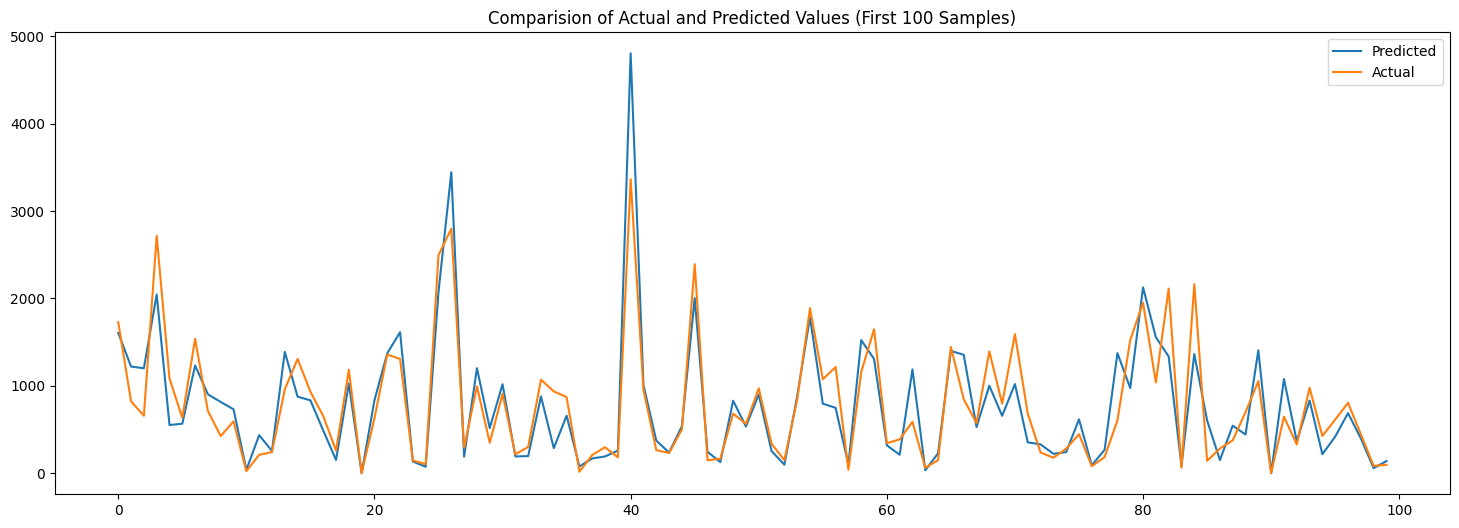

In [58]:
print(pred_vs_actual())

#### Feature Importance

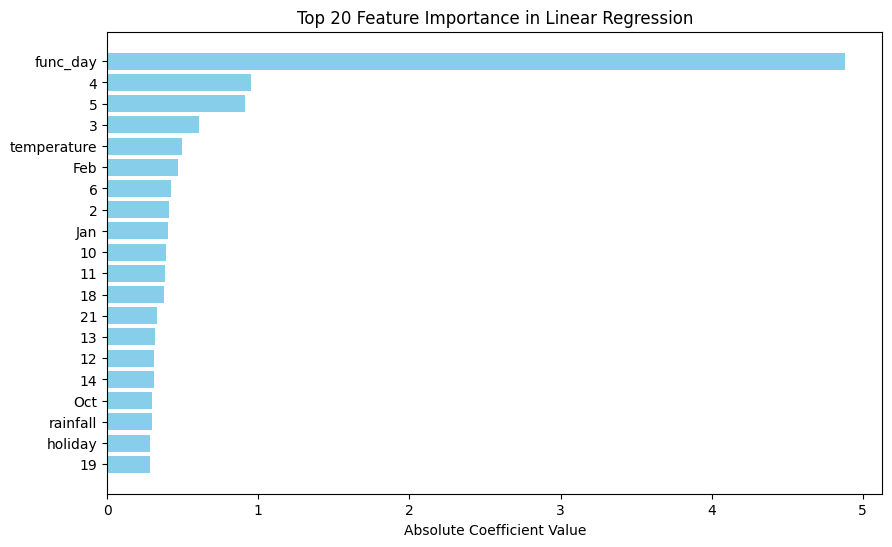

In [59]:
# Get feature names and coefficients
feature_names = df.drop(['rented_bike_count'], axis=1).columns
coefficients = lr.coef_

# Create a DataFrame to hold feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate the absolute coefficient values
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])

# Sort the DataFrame by coefficient magnitude (absolute value) and select the top 20
top_20_features = feature_importance_df.nlargest(20, 'Abs_Coefficient')

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 20 Feature Importance in Linear Regression')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


### ML Model - 2 - Implementing Polynomial Regression

In [60]:
# ML Model - 2 Implementation
poly = PolynomialFeatures(degree = 2)
lr = LinearRegression()

# Fit the Algorithm
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
lr.fit(X_poly_train, y_train)

# Predict on the model
y_train_pred = lr.predict(X_poly_train)
y_test_pred = lr.predict(X_poly_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation_metric_score_chart_of_polynomial_reg():

  # reverse transformation of actual and predicted dependent variable
  y_train_pred_org = np.expm1(y_train_pred)
  y_test_pred_org = np.expm1(y_test_pred)
  y_train_org = np.expm1(y_train)
  y_test_org = np.expm1(y_test)

  # Evaluation metrics on train data
  train_MSE  = round(mean_squared_error(y_train_org, y_train_pred_org),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_MAE = round(mean_absolute_error(y_train_org, y_train_pred_org),3)
  train_r2 = round(r2_score(y_train_org, y_train_pred_org),3)
  n_train, p_train = X_train.shape
  train_adj_r2 = round(1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1), 3)

  # Evaluation mertrics for test data
  test_MSE  = round(mean_squared_error(y_test_org, y_test_pred_org),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_MAE = round(mean_absolute_error(y_test_org, y_test_pred_org),3)
  test_r2 = round(r2_score(y_test_org, y_test_pred_org),3)
  n_test, p_test = X_test.shape
  test_adj_r2 = round(1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1), 3)


  from prettytable import PrettyTable
  score_chart = PrettyTable()
  score_chart.field_names = ["Metrics", "Values On Train Data", "Values On Test Data"]
  score_chart.add_row(["R2", train_r2, test_r2 ])
  score_chart.add_row(["Adjusted R2", train_adj_r2, test_adj_r2])
  score_chart.add_row(["Mean Squared Error (MSE)", train_MSE, test_MSE])
  score_chart.add_row(["Root Mean Squared Error (RMSE)", train_RMSE, test_RMSE])
  score_chart.add_row(["Mean Absolute Error (MAE)", train_MAE, test_MAE])


  return score_chart

In [62]:
print(evaluation_metric_score_chart_of_polynomial_reg())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.923         |         0.9         |
|          Adjusted R2           |        0.922         |        0.897        |
|    Mean Squared Error (MSE)    |      32141.368       |      41772.862      |
| Root Mean Squared Error (RMSE) |        179.28        |       204.384       |
|   Mean Absolute Error (MAE)    |       108.435        |       121.108       |
+--------------------------------+----------------------+---------------------+


None


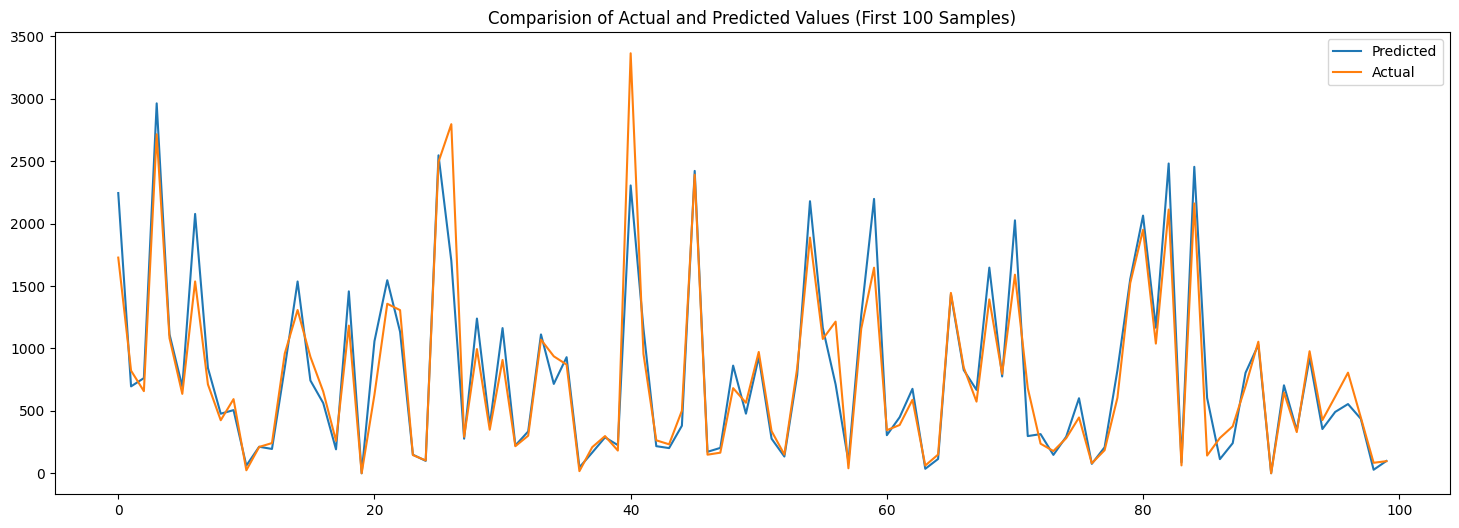

In [63]:
print(pred_vs_actual())

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Implementing Decision Tree Regressor

In [65]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fit the Algorithm
dt.fit(X_train, y_train)

# Predict on the model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
def feature_importance_by_permutation_method(model):
  perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
  importance_scores = perm_importance.importances_mean

  feat_imp = pd.Series(importance_scores, index=df.drop(['rented_bike_count'], axis=1).columns)
  plt.figure(figsize=(10, 5))

  # Reverse the order of feat_imp to make maximum values appear on the upper side
  feat_imp.nlargest(20)[::-1].plot(kind='barh', color='red')
  plt.xlabel('Permutation Importance')
  plt.ylabel('Features')
  plt.title('Top 20 Features by Permutation Importance')


In [67]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |         1.0          |        0.795        |
|          Adjusted R2           |         1.0          |        0.789        |
|    Mean Squared Error (MSE)    |         0.0          |      85528.756      |
| Root Mean Squared Error (RMSE) |         0.0          |       292.453       |
|   Mean Absolute Error (MAE)    |         0.0          |       158.705       |
+--------------------------------+----------------------+---------------------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dt_params = {'max_depth':[5,10, 20, 30, 35, None],
             'min_samples_leaf' : [1, 2, 5, 10]
             }

dt_gridsearch = GridSearchCV(dt, dt_params, cv=5, n_jobs= -1, verbose = 3)
grid_result=dt_gridsearch.fit(X_train, y_train)
bp = grid_result.best_params_
print("Best Parameters = ", bp)
dt = DecisionTreeRegressor(max_depth = bp['max_depth'], min_samples_leaf= bp['min_samples_leaf'])

# Fit the Algorithm

dt.fit(X_train, y_train)

# Predict on the model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters =  {'max_depth': None, 'min_samples_leaf': 5}


In [69]:
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.939         |        0.823        |
|          Adjusted R2           |        0.939         |        0.818        |
|    Mean Squared Error (MSE)    |      25337.153       |      73543.695      |
| Root Mean Squared Error (RMSE) |       159.176        |       271.189       |
|   Mean Absolute Error (MAE)    |        91.329        |       155.489       |
+--------------------------------+----------------------+---------------------+


None


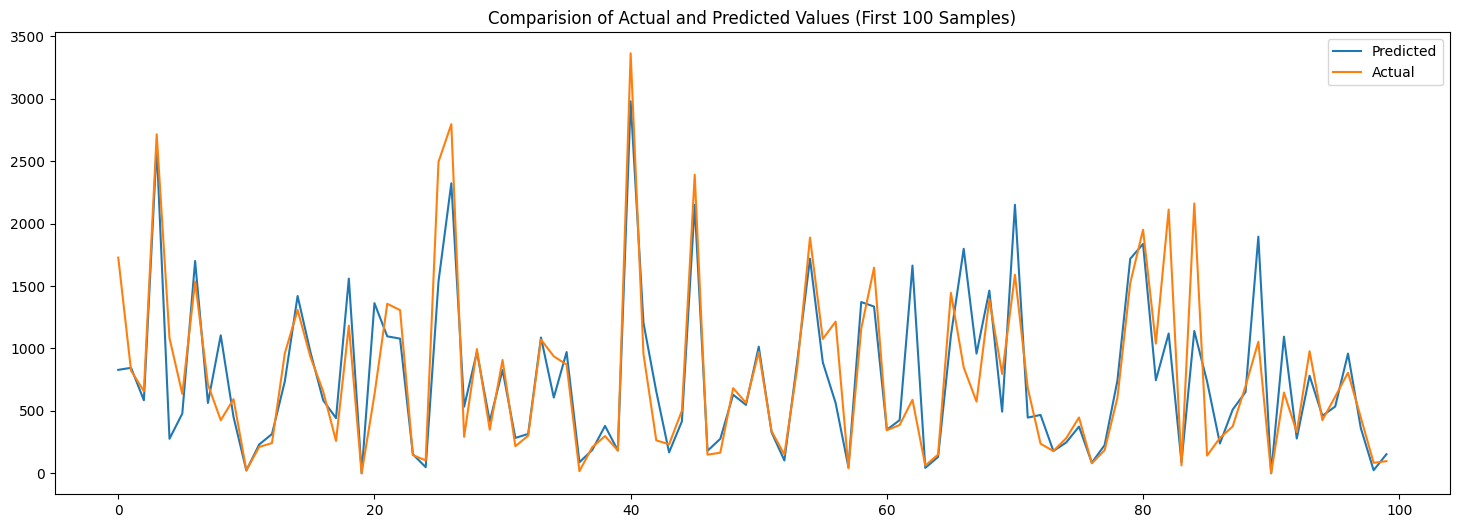

In [70]:
print(pred_vs_actual())

In [71]:
def feature_importance(model):
  feat_imp = pd.Series(model.feature_importances_, index=df.drop(['rented_bike_count'], axis=1).columns)
  plt.figure(figsize=(10, 5))
  plt.title('Top 20 Feature Importance')

  # Reverse the order of feat_imp to make maximum values appear on the upper side
  feat_imp.nlargest(20)[::-1].plot(kind='barh', color='red')
  plt.xlabel('Relative Importance')


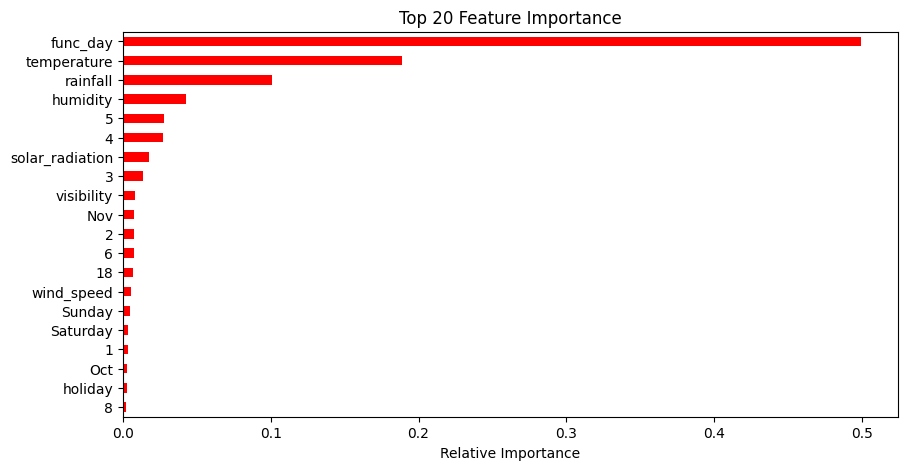

In [72]:
feature_importance(dt)

##### Which hyperparameter optimization technique have you used and why?

I have used GridsearCV method for hyperparameter optimization.

There are a lot of different combinations of hyperparameters but we don't know which combination will work better. So, to ind the best combination of hyperparameters I have used the GridsearchCV method.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. So we can get the best result on the unseen data.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There are slightly diference in accuracy of the testing dataset before and aftert the hyperparameter optimization but initially the model was completely overfit and after the hyperparameter optimization it imporved.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 4 - Implementing Random Forest Regressor

In [73]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

# Fit the Algorithm
rf.fit(X_train, y_train)

# Predict on the model
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.985         |        0.896        |
|          Adjusted R2           |        0.985         |        0.894        |
|    Mean Squared Error (MSE)    |       6362.047       |      43124.681      |
| Root Mean Squared Error (RMSE) |        79.762        |       207.665       |
|   Mean Absolute Error (MAE)    |        44.061        |       115.772       |
+--------------------------------+----------------------+---------------------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_param_grid = {
    'max_depth':[5, 10, None],
    'min_samples_split': [2, 5],
    'n_estimators': [100, 300, 500],
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, verbose= 3, n_jobs= -1)
grid_result=rf_grid_search.fit(X_train, y_train)
bp = grid_result.best_params_
print("Best Parameters = ", bp)
rf = RandomForestRegressor(n_estimators= bp['n_estimators'], max_depth = bp['max_depth'], min_samples_split= bp['min_samples_split'])

# Fit the Algorithm

rf.fit(X_train, y_train)

# Predict on the model
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters =  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [76]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.985         |        0.898        |
|          Adjusted R2           |        0.985         |        0.895        |
|    Mean Squared Error (MSE)    |       6301.552       |      42595.086      |
| Root Mean Squared Error (RMSE) |        79.382        |       206.386       |
|   Mean Absolute Error (MAE)    |        43.691        |       115.047       |
+--------------------------------+----------------------+---------------------+


None


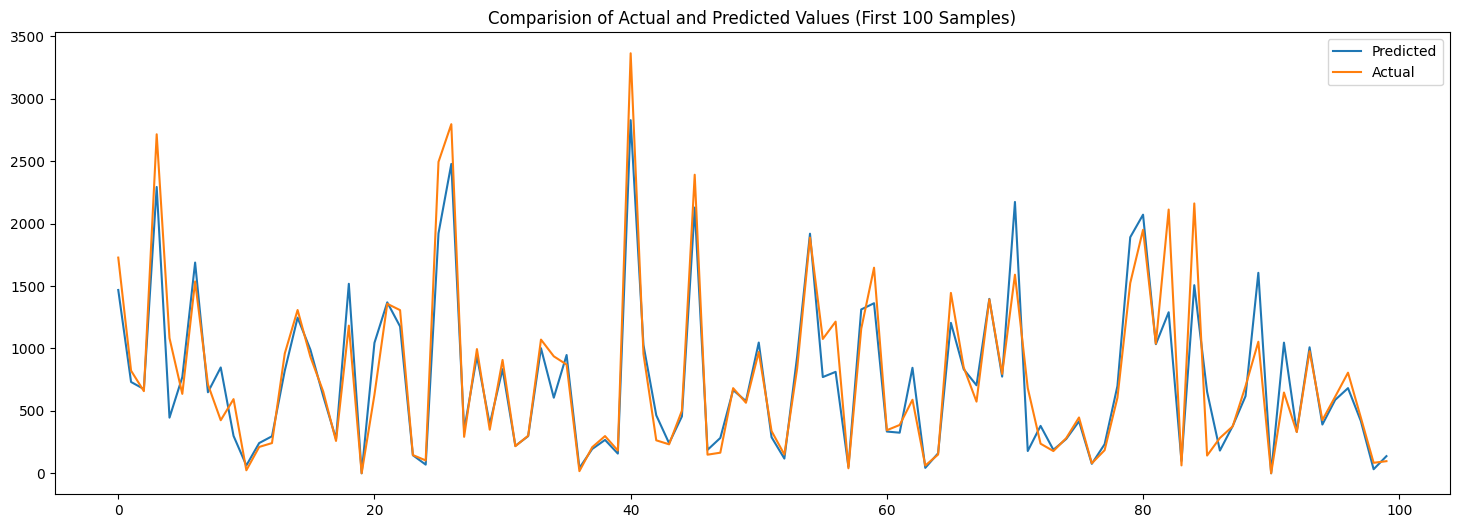

In [77]:
print(pred_vs_actual())

None


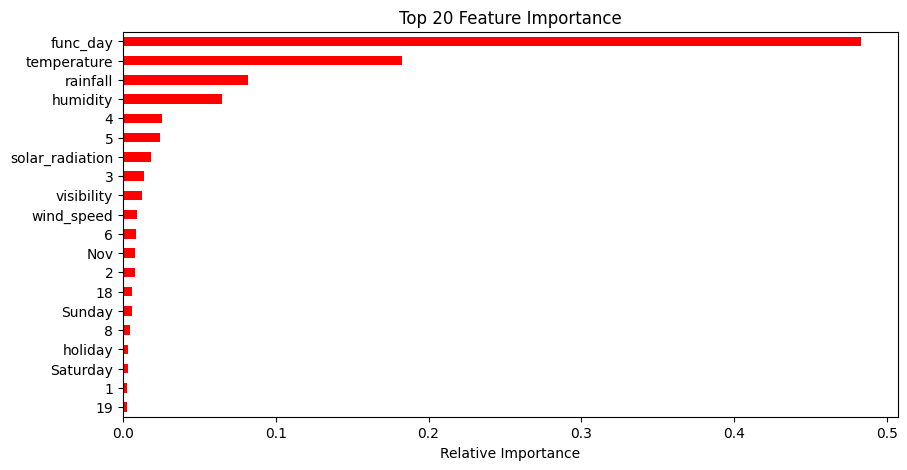

In [78]:
# feature importance
print(feature_importance(rf))

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there are no improvement after the hyperparameter optimization.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 5 - Implementing GradientBoostingRegressor

In [ ]:
# ML Model - 5 Implementation
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Fit the Algorithm
gb.fit(X_train, y_train)

# Predict on the model
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.788         |        0.782        |
|          Adjusted R2           |        0.786         |        0.776        |
|    Mean Squared Error (MSE)    |      88203.363       |      90628.631      |
| Root Mean Squared Error (RMSE) |       296.991        |       301.046       |
|   Mean Absolute Error (MAE)    |       187.087        |       188.935       |
+--------------------------------+----------------------+---------------------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gb_param_grid = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.1, 10, 100]
}

gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5, n_jobs= 2, verbose= 3)
grid_result=gb_grid_search.fit(X_train, y_train)
bp = grid_result.best_params_
print("Best Parameters = ", bp)
gb = GradientBoostingRegressor(n_estimators= bp['n_estimators'], learning_rate = bp['learning_rate'])

# Fit the Algorithm

gb.fit(X_train, y_train)

# Predict on the model
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 9.12068446e-001  9.29531760e-001  9.41345660e-001 -5.07892512e+190
             -inf              nan             -inf              nan
              nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:961: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:961: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


Best Parameters =  {'learning_rate': 0.1, 'n_estimators': 500}


In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |         0.92         |        0.901        |
|          Adjusted R2           |        0.919         |        0.899        |
|    Mean Squared Error (MSE)    |      33423.408       |      41040.627      |
| Root Mean Squared Error (RMSE) |       182.821        |       202.585       |
|   Mean Absolute Error (MAE)    |       110.541        |       120.043       |
+--------------------------------+----------------------+---------------------+


None


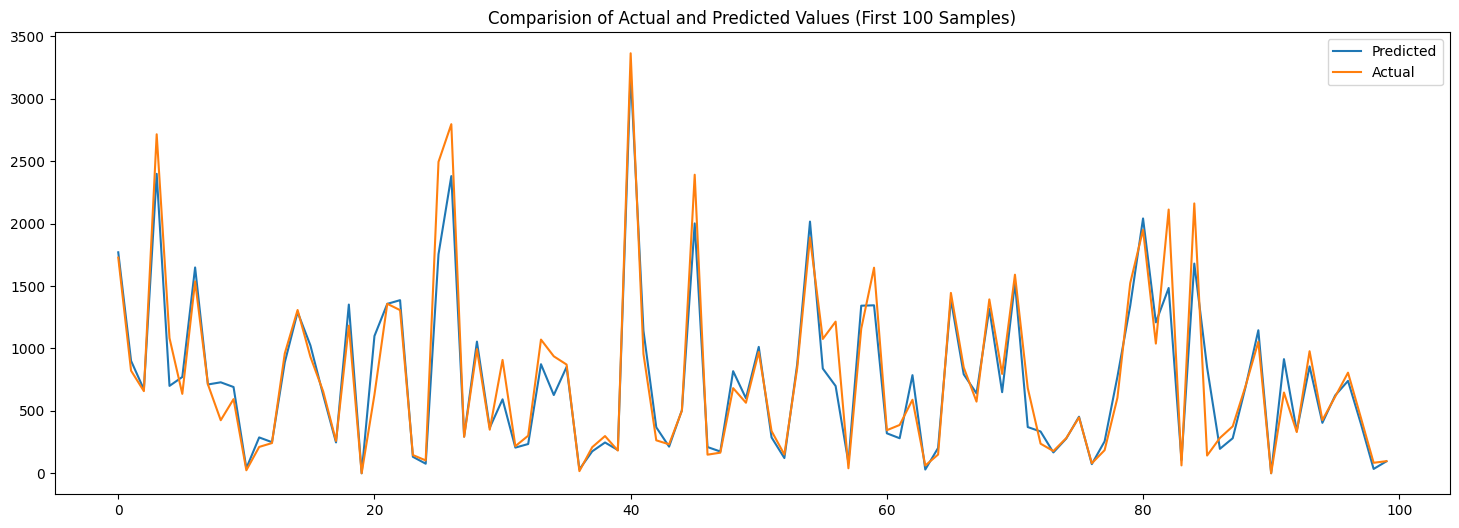

In [ ]:
print(pred_vs_actual())

None


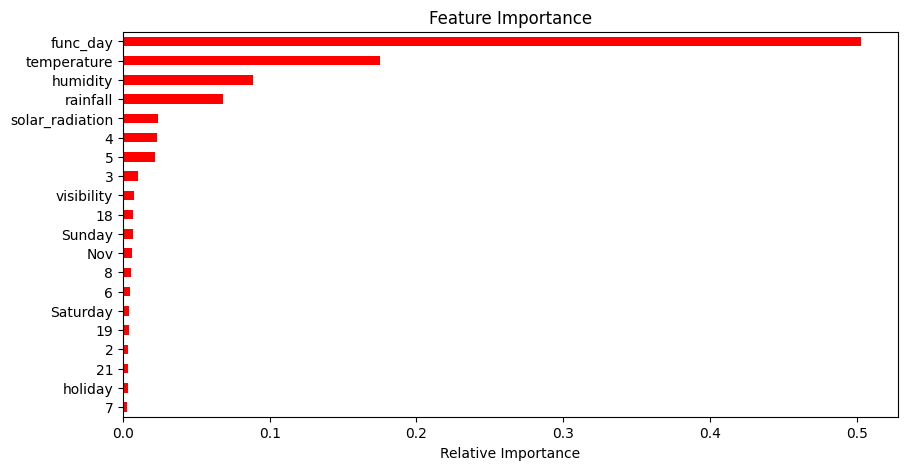

In [ ]:
print(feature_importance(gb))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter optimization, there is a substantial enhancement in model performance across all evaluation metrics.

* R2 (Coefficient of Determination) has increased from 0.782 to 0.901, indicating a substantially better fit to the data.
* Adjusted R2 has improved from 0.776 to 0.899, demonstrating enhanced model explanatory power.
* MSE has reduced from 90628.631 to 41040.627, signifying more accurate predictions.
* RMSE has decreased from 301.046 to 202.585, showing that prediction errors are significantly smaller.
* MAE has dropped from 188.935 to 120.043, indicating improved prediction accuracy.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 6 - Implementing Extreme GradientBoosting Regressor

In [ ]:
# ML Model - 2 Implementation
from scipy.stats.distributions import alpha
gb = GradientBoostingRegressor()
import xgboost as xgb
xtgb = xgb.XGBRegressor()

# Fit the Algorithm
xtgb.fit(X_train, y_train)

# Predict on the model
y_train_pred = xtgb.predict(X_train)
y_test_pred = xtgb.predict(X_test)



In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |         0.97         |         0.91        |
|          Adjusted R2           |         0.97         |        0.907        |
|    Mean Squared Error (MSE)    |      12540.547       |      37485.518      |
| Root Mean Squared Error (RMSE) |       111.985        |       193.612       |
|   Mean Absolute Error (MAE)    |        65.358        |        108.07       |
+--------------------------------+----------------------+---------------------+


In [ ]:
print(pred_vs_actual(y_test_pred, y_test))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xtgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'alpha': [0.1, 10, 100],
    'learning_rate': [0.1, 1.0]
}

xtgb_grid_search = GridSearchCV(xtgb, xtgb_param_grid, cv=3, verbose= 3, n_jobs= -1)
grid_result=xtgb_grid_search.fit(X_train, y_train)
bp = grid_result.best_params_
print("Best Parameters = ", bp)
xtgb = xgb.XGBRegressor(n_estimators= bp['n_estimators'], learning_rate = bp['learning_rate'], alpha = bp['alpha'])

# Fit the Algorithm

xtgb.fit(X_train, y_train)

# Predict on the model
y_train_pred = xtgb.predict(X_train)
y_test_pred = xtgb.predict(X_test)



Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters =  {'alpha': 0.1, 'learning_rate': 0.1, 'n_estimators': 500}


In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.985         |        0.924        |
|          Adjusted R2           |        0.984         |        0.921        |
|    Mean Squared Error (MSE)    |       6433.873       |      31854.719      |
| Root Mean Squared Error (RMSE) |        80.211        |       178.479       |
|   Mean Absolute Error (MAE)    |        45.996        |        97.356       |
+--------------------------------+----------------------+---------------------+


None


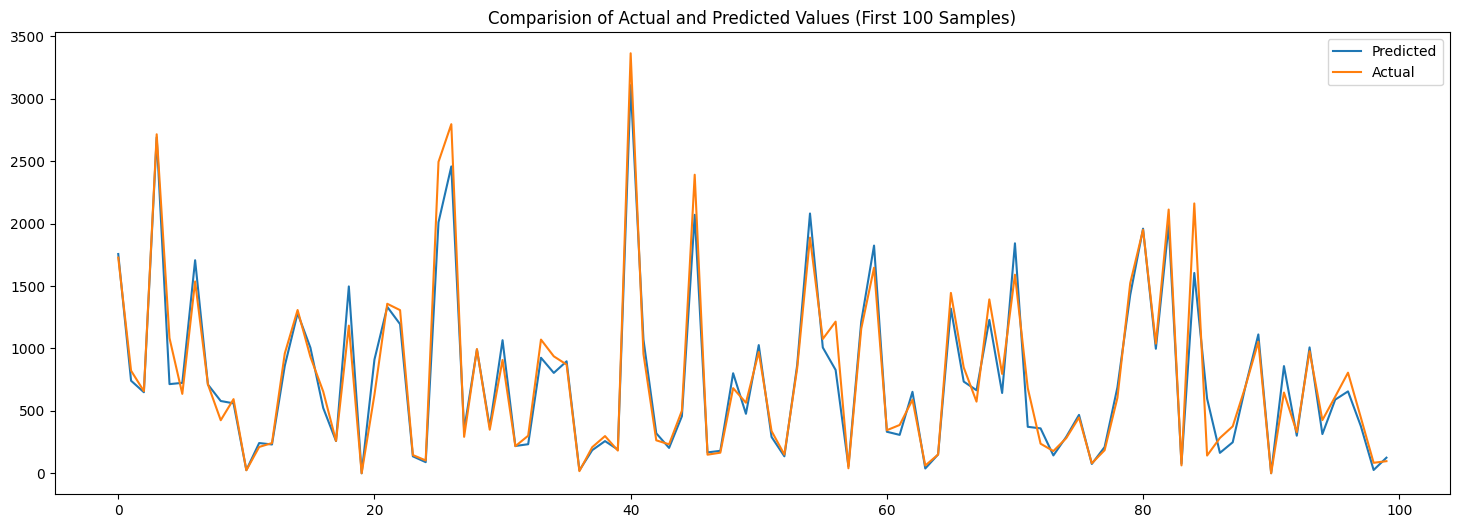

In [ ]:
print(pred_vs_actual())

None


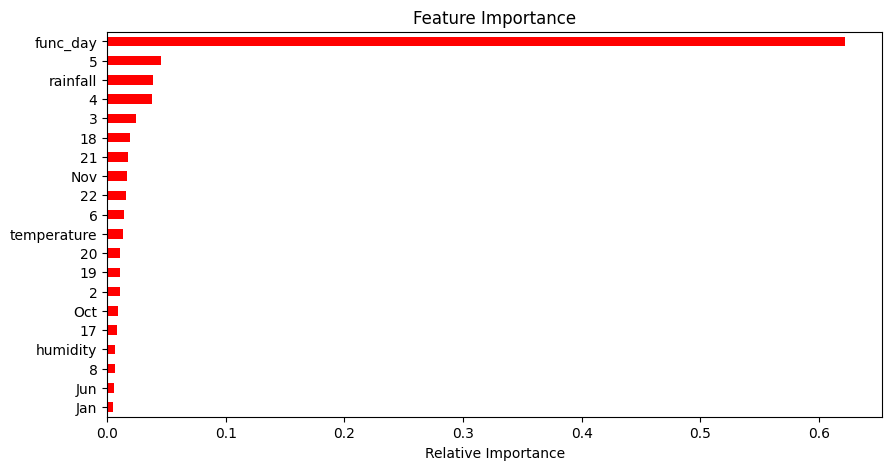

In [ ]:
# feature Importance
print(feature_importance(xtgb))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter optimization, there is a significant improvement in model performance:

* R2 (Coefficient of Determination) has increased from 0.91 to 0.924, indicating a better fit to the data.
* Adjusted R2 has improved from 0.907 to 0.921, demonstrating enhanced model explanatory power.
* MSE has reduced from 37485.518 to 31854.719, signifying more accurate predictions.
* RMSE has decreased from 193.612 to 178.479, showing that prediction errors are smaller.
* MAE has dropped from 108.07 to 97.356, indicating improved prediction accuracy.





#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 7 - Implementing LGBM Regressor

In [ ]:
# ML Model - 7
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()

# Fit the Algorithm
lgb.fit(X_train, y_train)

# Predict on the model
y_train_pred = lgb.predict(X_train)
y_test_pred = lgb.predict(X_test)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 49
[LightGBM] [Info] Start training from score 5.884864


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.941         |         0.92        |
|          Adjusted R2           |         0.94         |        0.918        |
|    Mean Squared Error (MSE)    |       24591.84       |      33146.182      |
| Root Mean Squared Error (RMSE) |       156.818        |       182.061       |
|   Mean Absolute Error (MAE)    |        93.613        |       104.734       |
+--------------------------------+----------------------+---------------------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lgb_param_grid = {
    'alpha': [0.1, 10, 100],
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.1, 1.0, 10, 100],
    'n_estimators': [100, 300, 500, 800],
}

lgb_grid_search = GridSearchCV(lgb, lgb_param_grid, cv=5, verbose= 3, n_jobs= -1)
grid_result=lgb_grid_search.fit(X_train, y_train)
bp = grid_result.best_params_
print("Best Parameters = ", bp)
lgb = LGBMRegressor(n_estimators= bp['n_estimators'], learning_rate = bp['learning_rate'], num_leaves = bp['num_leaves'], alpha = bp['alpha'])

# Fit the Algorithm

lgb.fit(X_train, y_train)

# Predict on the model
y_train_pred = lgb.predict(X_train)
y_test_pred = lgb.predict(X_test)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 49
[LightGBM] [Info] Start training from score 5.884864
Best Parameters =  {'alpha': 0.1, 'learning_rate': 0.1, 'n_estimators': 800, 'num_leaves': 31}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 49
[LightGBM] [Info] Start training from score 5.884864


In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |         0.99         |        0.931        |
|          Adjusted R2           |         0.99         |        0.929        |
|    Mean Squared Error (MSE)    |       4248.99        |      28690.567      |
| Root Mean Squared Error (RMSE) |        65.184        |       169.383       |
|   Mean Absolute Error (MAE)    |        37.92         |        93.573       |
+--------------------------------+----------------------+---------------------+


None


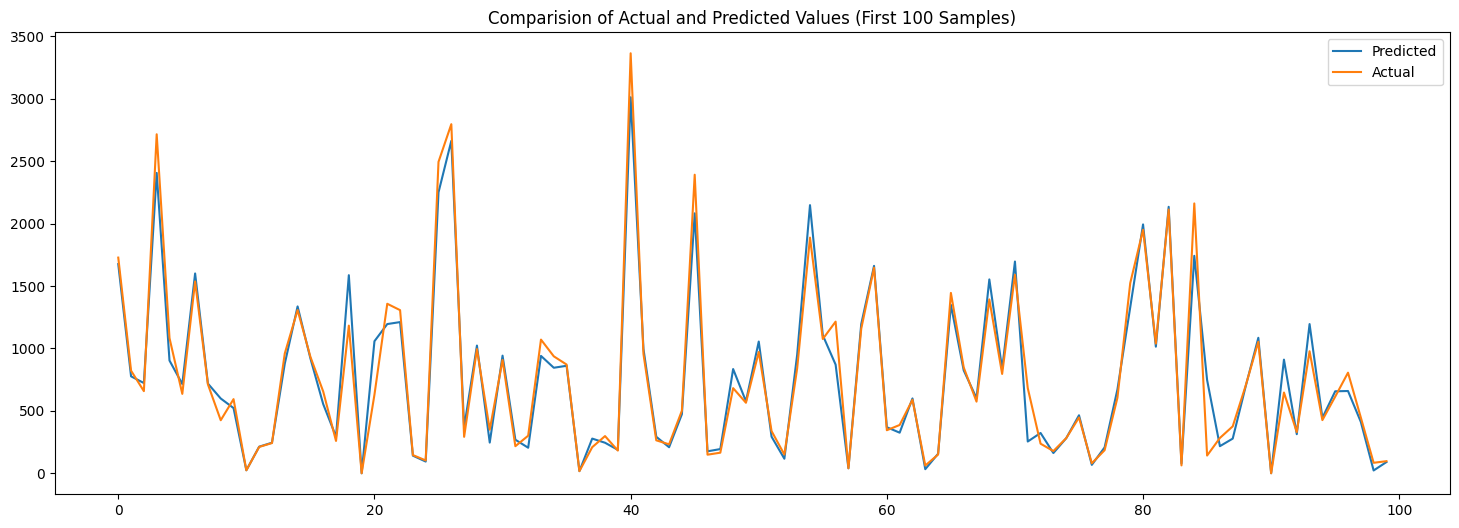

In [ ]:
print(pred_vs_actual())

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter optimization, there is a significant improvement in model performance:

* R2 (Coefficient of Determination) has increased from 0.92 to 0.931, indicating a better fit to the data.
* Adjusted R2 has improved from 0.918 to 0.929, demonstrating enhanced model explanatory power.
* MSE has reduced from 33146.182 to 28690.567, signifying more accurate predictions.
* RMSE has decreased from 182.061 to 169.383, showing that prediction errors are smaller.
* MAE has dropped from 104.734 to 93.573, indicating improved prediction accuracy

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 9 - Implementing

In [ ]:
# ML Model - 3 Implementation
from sklearn.svm import SVR
svr = SVR()

# Fit the Algorithm
svr.fit(X_train, y_train)

# Predict on the model
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)


In [ ]:
# Calculate permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svr, X_test, y_test, n_repeats=3, random_state=42)

# Print feature importance scores
print("Permutation Importance:", perm_importance.importances_mean)

Permutation Importance: [0.13087265 0.03979843 0.00771552 0.00921741 0.03374733 0.13112745
 0.03287189 0.0051884  0.92091177 0.00364609 0.01078956 0.02507239
 0.04601674 0.03998873 0.00956624 0.0058966  0.01445413 0.00369885
 0.00607795 0.00318939 0.00252662 0.00349503 0.0032377  0.0019697
 0.00111887 0.00256505 0.01109244 0.007102   0.005885   0.00582109
 0.00571088 0.00146935 0.00345599 0.00612045 0.01346515 0.01359027
 0.00569974 0.00811309 0.00487681 0.00355595 0.00478381 0.00456319
 0.0024997  0.00595578 0.01184648 0.01893782 0.00362894 0.00293725
 0.00199312]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.956         |        0.925        |
|          Adjusted R2           |        0.956         |        0.922        |
|    Mean Squared Error (MSE)    |      18185.448       |      31412.731      |
| Root Mean Squared Error (RMSE) |       134.853        |       177.236       |
|   Mean Absolute Error (MAE)    |        75.741        |        94.55        |
+--------------------------------+----------------------+---------------------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best: 0.940916 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'sigmoid'],
}

svr_grid_search = GridSearchCV(svr, svr_param_grid, cv=2, verbose= 3, n_jobs= -1)
grid_result=svr_grid_search.fit(X_train, y_train)
bp = grid_result.best_params_
print("Best Parameters = ", bp)
svr = SVR(C = bp['C'], gamma = bp['gamma'], kernel= bp['kernel'])

# Fit the Algorithm

svr.fit(X_train, y_train)

# Predict on the model
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)



Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters =  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Visualizing evaluation Metric Score chart
print(evaluation_metric_score_chart())

+--------------------------------+----------------------+---------------------+
|            Metrics             | Values On Train Data | Values On Test Data |
+--------------------------------+----------------------+---------------------+
|               R2               |        0.981         |        0.931        |
|          Adjusted R2           |        0.981         |        0.929        |
|    Mean Squared Error (MSE)    |       7808.805       |       28630.63      |
| Root Mean Squared Error (RMSE) |        88.367        |       169.206       |
|   Mean Absolute Error (MAE)    |        55.872        |        96.514       |
+--------------------------------+----------------------+---------------------+


In [ ]:
def feature_importance_by_permutation_method(model):
  perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
  importance_scores = perm_importance.importances_mean

  feat_imp = pd.Series(importance_scores, index=df.drop(['rented_bike_count'], axis=1).columns)
  plt.figure(figsize=(10, 5))

  # Reverse the order of feat_imp to make maximum values appear on the upper side
  feat_imp.nlargest(20)[::-1].plot(kind='barh', color='red')
  plt.xlabel('Permutation Importance')
  plt.ylabel('Features')
  plt.title('Top 20 Features by Permutation Importance')


In [ ]:
print(feature_importance_by_permutation_method(svr))

KeyboardInterrupt: ignored

In [ ]:
print(pred_vs_actual())

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter optimization, there is a significant improvement in model performance:

* R2 (Coefficient of Determination) has increased from 0.925 to 0.931, indicating a better fit to the data.
* Adjusted R2 has improved from 0.922 to 0.929, demonstrating enhanced model explanatory power.
* MSE has reduced from 31412.731 to 28630.63, signifying more accurate predictions.
* RMSE has decreased from 177.236 to 169.206, showing that prediction errors are smaller.
* MAE has dropped from 94.55 to 96.514, indicating improved prediction accuracy.





### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I will consider mainly RMSE and MAE and will take help of all other metrics to interpret the result.

The main reason is choosing the RMSE and MAE is that both are in the same unint as the bike rentals counts and easy to explain to the stakeholders the magnitude of the error that can happen.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The LightGBM Regressor (Gradinet Boosting) wiil be final model becauese its R2 score is high and MSE, RMSE and MAE is lower than the other models.

Although Support Vector Regressor(SVR) prediction is almost similar to the LGBM Regressor but it's too expensive means its computaint time is higher then the LGBM Regressor.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***